# Military Power Clustering

Source : globalfirepower.com on 1st may 2020

In [100]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <p style="background-color:#9c2162;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">MILITARY POWER SEGMENTATION</p>

## "War does not determine who is right - only who is left." - Bertrand Russell

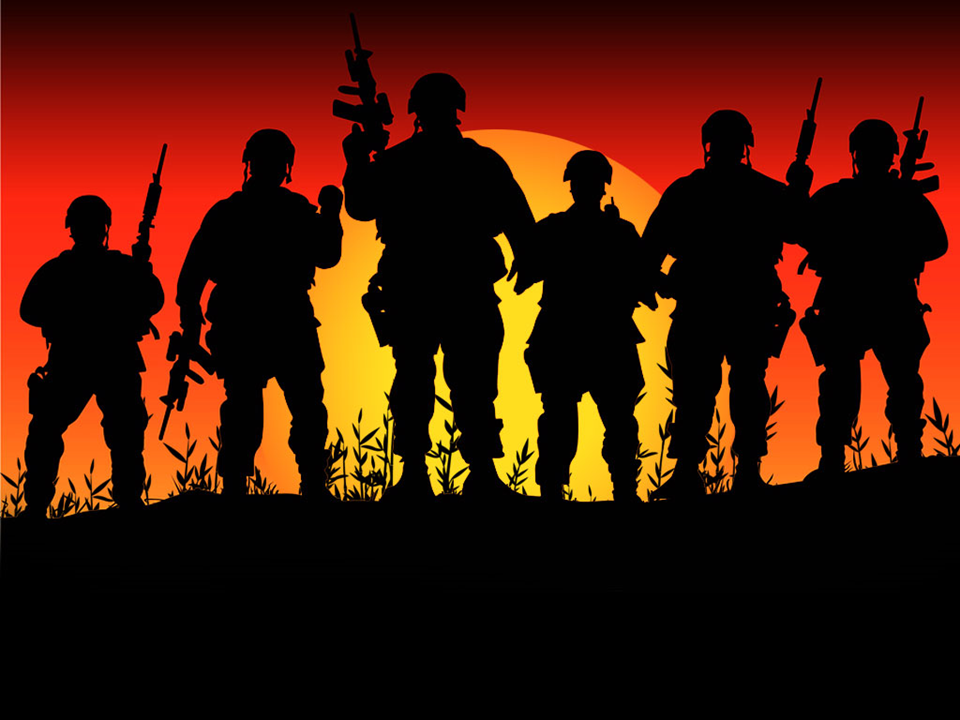

<p style="background-color:#9c2162;font-family:newtimeroman;color:#FFF9ED;font-size:140%;text-align:left;border-radius:10px 10px;">Image credit : https://www.slideteam.net/blog/top-25-army-military-powerpoint-templates-to-honor-our-heroes</p> 

<a id="toc"></a>

## <h3 style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;" class="list-group-item list-group-item-action active" data-toggle="list" role="tablist" aria-controls="home">Table of Contents</h3>

* [   PREFACE](#0)
* [1) LIBRARIES NEEDED IN THE STUDY](#1)
    * [1.1 User Defined Functions](#1.1)
* [2) DATA](#2)
    * [2.1 Context](#2.1)
    * [2.2 About the Features](#2.2) 
    * [2.3 What the Problem is](#2.3) 
* [3) ANALYSIS](#3)
    * [3.1) Reading the Data](#3)
* [4) EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION](#4)
    * [4.1 - A General Looking at the Data](#4.1)
    * [4.2 - Convert Multi-Index Columns To One Level](#4.2)
    * [4.3 - Handling with Missing Values](#4.3)
    * [4.4 - Handling with Data Types](#4.4)
    * [4.5 - The Selection of Features](#4.5)
    * [4.6 - The Visualization of Some Features](#4.6) 
    * [4.7 - Descriptive Statistics](#4.7) 
* [5) DATA PREPROCESSING](#5)     
    * [5.1 The Implementation of Scaling](#5.1)
* [6) MODELLING WITH K-MEANS](#6)        
    * [6.1 Hopkins Test](#6.1)
    * [6.2 The Implementation of K-Means](#6.2)
        * [6.2.1 Finding The Best K Value With Elbow Method](#6.2.1)
        * [6.2.2 The Implementation of K-Means With Optimal K Value & Visualization](#6.2.2)
        * [6.2.3 The Assesment of Silhouette Scores](#6.2.3)
* [7) MODELLING WITH HIERARCHICAL CLUSTER ANALYSIS (HCA)](#7)  
    * [7.1 The Assesment of Dentrogram](#7.1)
    * [7.2 The Assesment of Silhouette Scores For Hierarchical Cluster Analysis (HCA)](#7.2)   
    * [7.3 The Implementation of Hierarchical Cluster Analysis (HCA)](#7.3)
    
    
    




* [5) TRAIN | TEST SPLIT & HANDLING WITH MISSING VALUES](#5)    
    * [5.1 Train | Test Split](#5.1)
    * [5.2 Handling with Missing Values](#5.2) 
* [6) FEATURE SCALLING](#6)
    * [6.1 The Implementation of Scaling](#6.1)
    * [6.2 General Insights Before Going Further](#6.2)    
    * [6.3 Handling with Skewness with PowerTransform & Checking Model Accuracy Scores](#6.3)
* [7) MODELLING](#7)    
    * [7.1 The Implementation of Logistic Regression (LR)](#7.1)
        * [7.1.a Modelling Logistic Regression (LR) with Default Parameters](#7.1.a)
        * [7.1.b Cross-Validating Logistic Regression (LR) Model](#7.1.b)
        * [7.1.c Modelling Logistic Regression (LR) with Best Parameters Using GridSearchCV](#7.1.c)
        * [7.1.d ROC (Receiver Operating Curve) and AUC (Area Under Curve)](#7.1.d)
        * [7.1.e The Determination of The Optimal Treshold](#7.1.e)
    * [7.2 The Implementation of Support Vector Machine (SVM)](#7.2)
        * [7.2.a Modelling Support Vector Machine (SVM) with Default Parameters](#7.2.a)
        * [7.2.b Cross-Validating Support Vector Machine (SVM)](#7.2.b)
        * [7.2.c Modelling Support Vector Machine (SVM) with Best Parameters Using GridSearchCV](#7.2.c)
        * [7.2.d ROC (Receiver Operating Curve) and AUC (Area Under Curve)](#7.2.d)     
    * [7.3 The Implementation of Decision Tree (DT)](#7.3)
        * [7.3.a Modelling Decision Tree (DT) with Default Parameters](#7.3.a)
        * [7.3.b Cross-Validating Decision Tree (DT)](#7.3.b)
        * [7.3.c Modelling Decision Tree (DT) with Best Parameters Using GridSeachCV](#7.3.c)
        * [7.3.d Feature Importance for Decision Tree (DT) Model](#7.3.d)
        * [7.3.e ROC (Receiver Operating Curve) and AUC (Area Under Curve)](#7.3.e)
        * [7.3.f The Visualization of the Tree](#7.3.f)

* [8) THE COMPARISON OF MODELS](#8) 
* [9) CONLUSION](#9)
* [10) REFERENCES](#10)
* [11) FURTHER READINGS](#11)

<a id="0"></a>
## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">PREFACE</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In this Exploratory Data Analysis (EDA) and a variety of Model Classifications including Logistic Regression (LR), Support Vector Machine (SVM), AdaBoosting (AB), GradientBoosting (GB), K-Nearest Neighbors (KNN), Random Forest (RF), Desicion Tree (DT), XGBoost (XGB), this study will examine the dataset named as "Heart Failure Prediction" under the 'heart_failure_clinical_records' "csv" file at Kaggle website [external link text](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data).

This study, in general, will cover what any beginner in Machine Learning can do as much as possible for a better understanding with the given dataset not only by examining its various aspects but also visualising it. Later S/he will be familiar with eight (8) Classification Algorithms in Machine Learning.

<a id="1"></a>
## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">LIBRARIES NEEDED IN THE STUDY</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [370]:
# !pip install pyforest
# !pip install ipython
# !pip install pyclustertend

# 1-Import Libraies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 2-Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# 3-Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# 4-Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.warn("this will not show")

# 5-Figure&Display options
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#!pip install termcolor
from termcolor import colored
import missingno as msno 

# !pip3 install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

<a id="1.1"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">User Defined Functions</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [120]:
###############################################################################

def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

def missing_values(df):
    return missing(df)[missing(df)['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          f"There is ", df.shape[0], " observation and ", df.shape[1], " columns in the dataset.", '\n',
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("duplicates were dropped", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("No duplicates", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary drop some columns!!!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
        else:
            print(df.isnull().sum()[i], '%, percentage of missing values of', i ,'less than limit', limit, '%, so we will keep it.')
    print('New shape after missing value control:', df.shape)

###############################################################################

In [122]:
# Function for determining the number and percentages of missing values

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [121]:
# To view summary information about the column

def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

<a id="2"></a>
## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">DATA</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

This is a data that allows you to see the world military rankings in 2020 and numerical status such as the army, navy, and air force. In addition, some features such as population and economy related to military power are also included.

https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx

<a id="2.1"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Context</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

<a id="2.2"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">About The Features</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>



<a id="2.3"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">What The Problem Is</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

- In the given study, we have a clustering problem.
- We will try to find the clusters in the given dataset.
- Lastly we will build a variety of Unsupervised algorithms including K-Means and Hierarchical Cluster Analysis (HCA).

<a id="3"></a>
## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">ANALYSIS</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

<a id="3.1"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">Reading The Data</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [123]:
df0 = pd.read_csv("World_Military_Power.csv", header=1)
df = df0.copy()

In [124]:
df.head()

Military Strength  Military Strength Power Index Aircraft Strength  \
0       Afghanistan                          1.344       Afghanistan   
1           Albania                          2.314           Albania   
2           Algeria                          0.466           Algeria   
3            Angola                          0.838            Angola   
4         Argentina                          0.652         Argentina   

  Aircraft Strength value Fighter/Interceptor Strength  \
0                     260                  Afghanistan   
1                      19                      Albania   
2                     551                      Algeria   
3                     295                       Angola   
4                     227                    Argentina   

  Fighter/Interceptor Strength value Attack Aircraft Strength  \
0                                  0              Afghanistan   
1                                  0                  Albania   
2                                103                  Algeria   
3                                 72                   Angola   
4                                 24                Argentina   

   Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
0                              25                       Afghanistan   
1                               0                           Albania   
2                              22                           Algeria   
3                              18                            Angola   
4                               7                         Argentina   

   Transport Aircraft Fleet Strength value Trainer Aircraft Fleet  \
0                                       30            Afghanistan   
1                                        0                Albania   
2                                       59                Algeria   
3                                       30                 Angola   
4                                        9              Argentina   

  Trainer Aircraft Fleet value Helicopter Fleet Strength  \
0                            0               Afghanistan   
1                            0                   Albania   
2                           87                   Algeria   
3                           47                    Angola   
4                           64                 Argentina   

  Helicopter Fleet Strength value Attack Helicopter Fleet Strength  \
0                             187                      Afghanistan   
1                              19                          Albania   
2                             257                          Algeria   
3                             126                           Angola   
4                             100                        Argentina   

   Attack Helicopter Fleet Strength value Tank Strength Tank Strength value  \
0                                       0   Afghanistan                   0   
1                                       0       Albania                   0   
2                                      45       Algeria                 880   
3                                      15        Angola                 379   
4                                       0     Argentina                 370   

  AFV/APC Strength AFV/APC Strength value Self-Propelled Artillery Strength  \
0      Afghanistan                  1,062                       Afghanistan   
1          Albania                    467                           Albania   
2          Algeria                  7,361                           Algeria   
3           Angola                    595                            Angola   
4        Argentina                    739                         Argentina   

  Self-Propelled Artillery Strength value Towed Artillery Strength  \
0                                       0              Afghanistan   
1                                       0                  Albania   
2                                     320    

<a id="4"></a>
## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>



In this Exploratory Data Analysis section the data will be analyzed by summarizing its main characteristics, using statistical graphics and other data visualization methods. As such the reader will be familiar with what the data can tell.

**You can use first_looking(df) user defined function above for getting a general insight before going further in the analysis**

In [125]:
first_looking(df)

Shape:(138, 60)
There is 138 observation and 60 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    object 
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    object 
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Streng

<a id="4.1"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">A General Looking at the Data</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [126]:
df.head(3)

military_strength  military_strength_power_index aircraft_strength  \
0       Afghanistan                          1.344       Afghanistan   
1           Albania                          2.314           Albania   
2           Algeria                          0.466           Algeria   

  aircraft_strength_value fighter/interceptor_strength  \
0                     260                  Afghanistan   
1                      19                      Albania   
2                     551                      Algeria   

  fighter/interceptor_strength_value attack_aircraft_strength  \
0                                  0              Afghanistan   
1                                  0                  Albania   
2                                103                  Algeria   

   attack_aircraft_strength_value transport_aircraft_fleet_strength  \
0                              25                       Afghanistan   
1                               0                           Albania   
2                              22                           Algeria   

   transport_aircraft_fleet_strength_value trainer_aircraft_fleet  \
0                                       30            Afghanistan   
1                                        0                Albania   
2                                       59                Algeria   

  trainer_aircraft_fleet_value helicopter_fleet_strength  \
0                            0               Afghanistan   
1                            0                   Albania   
2                           87                   Algeria   

  helicopter_fleet_strength_value attack_helicopter_fleet_strength  \
0                             187                      Afghanistan   
1                              19                          Albania   
2                             257                          Algeria   

   attack_helicopter_fleet_strength_value tank_strength tank_strength_value  \
0                                       0   Afghanistan                   0   
1                                       0       Albania                   0   
2                                      45       Algeria                 880   

  afv/apc_strength afv/apc_strength_value self-propelled_artillery_strength  \
0      Afghanistan                  1,062                       Afghanistan   
1          Albania                    467                           Albania   
2          Algeria                  7,361                           Algeria   

  self-propelled_artillery_strength_value towed_artillery_strength  \
0                                       0              Afghanistan   
1                                       0                  Albania   
2                                     320                  Algeria   

  towed_artillery_strength_value rocket_projector_strength  \
0                            176               Afghanistan   
1                              0                   Albania   
2                            240                   Algeria   

  rocket_projector_strength_value navy_fleet_strengths  \
0                              50          Afghanistan   
1                               0              Albania   
2                             316              Algeria   

   navy_fleet_strengths_value aircraft_carrier_fleet_strength  \
0                       0.000                     Afghanistan   
1                      38.000                         Albania   
2                     201.000                         Algeria   

   aircraft_carrier_fleet_strength_value submarine_fleet_strength  \
0                                  0.000              Afghanistan   
1                                  0.000                  Albania   
2                                  0.000                  Algeria   

   submarine_fleet_strength_value destroyer_fleet_strength  \
0                           0.000              Afghanistan   
1                           0.000                  Albania   
2             

In [127]:
df.tail(3)

military_strength  military_strength_power_index aircraft_strength  \
135             Yemen                          1.241             Yemen   
136            Zambia                          1.646            Zambia   
137          Zimbabwe                          1.758          Zimbabwe   

    aircraft_strength_value fighter/interceptor_strength  \
135                     169                        Yemen   
136                     108                       Zambia   
137                      90                     Zimbabwe   

    fighter/interceptor_strength_value attack_aircraft_strength  \
135                                 77                    Yemen   
136                                 18                   Zambia   
137                                 10                 Zimbabwe   

     attack_aircraft_strength_value transport_aircraft_fleet_strength  \
135                               0                             Yemen   
136                               0                            Zambia   
137                               0                          Zimbabwe   

     transport_aircraft_fleet_strength_value trainer_aircraft_fleet  \
135                                        8                  Yemen   
136                                       11                 Zambia   
137                                       14               Zimbabwe   

    trainer_aircraft_fleet_value helicopter_fleet_strength  \
135                           21                     Yemen   
136                           52                    Zambia   
137                           38                  Zimbabwe   

    helicopter_fleet_strength_value attack_helicopter_fleet_strength  \
135                              61                            Yemen   
136                              27                           Zambia   
137                              28                         Zimbabwe   

     attack_helicopter_fleet_strength_value tank_strength tank_strength_value  \
135                                      14         Yemen                 620   
136                                       0        Zambia                  75   
137                                       6      Zimbabwe                  42   

    afv/apc_strength afv/apc_strength_value self-propelled_artillery_strength  \
135            Yemen                    615                             Yemen   
136           Zambia                    184                            Zambia   
137         Zimbabwe                    300                          Zimbabwe   

    self-propelled_artillery_strength_value towed_artillery_strength  \
135                                      20                    Yemen   
136                                       0                   Zambia   
137                                       0                 Zimbabwe   

    towed_artillery_strength_value rocket_projector_strength  \
135                             85                     Yemen   
136                             42                    Zambia   
137                             65                  Zimbabwe   

    rocket_projector_strength_value navy_fleet_strengths  \
135                             150                Yemen   
136                              50               Zambia   
137                              22             Zimbabwe   

     navy_fleet_strengths_value aircraft_carrier_fleet_strength  \
135                      30.000                           Yemen   
136                       0.000                          Zambia   
137                       0.000                        Zimbabwe   

     aircraft_carrier_fleet_strength_value submarine_fleet_strength  \
135                                  0.000                    Yemen   
136                                  0.000                   Zambia   
137                                  0.000                 Zimbabwe   

     submarine_fleet_strength_value destroyer_fleet_strength  \
135                       

In [128]:
df.sample(10)

military_strength  military_strength_power_index aircraft_strength  \
88    North Macedonia                          3.181   North Macedonia   
73             Mexico                          0.607            Mexico   
51               Iran                          0.219              Iran   
82        Netherlands                          0.592       Netherlands   
129    United Kingdom                          0.172    United Kingdom   
65            Lebanon                          2.519           Lebanon   
95        Philippines                          0.785       Philippines   
106          Slovakia                          0.847          Slovakia   
112             Spain                          0.339             Spain   
39            Finland                          0.850           Finland   

    aircraft_strength_value fighter/interceptor_strength  \
88                       20              North Macedonia   
73                      484                       Mexico   
51                      509                         Iran   
82                      168                  Netherlands   
129                     733               United Kingdom   
65                       70                      Lebanon   
95                      171                  Philippines   
106                      47                     Slovakia   
112                     512                        Spain   
39                      194                      Finland   

    fighter/interceptor_strength_value attack_aircraft_strength  \
88                                   0          North Macedonia   
73                                   3                   Mexico   
51                                 155                     Iran   
82                                  61              Netherlands   
129                                133           United Kingdom   
65                                   0                  Lebanon   
95                                   0              Philippines   
106                                 10                 Slovakia   
112                                137                    Spain   
39                                  55                  Finland   

     attack_aircraft_strength_value transport_aircraft_fleet_strength  \
88                                0                   North Macedonia   
73                               33                            Mexico   
51                               23                              Iran   
82                                1                       Netherlands   
129                              15                    United Kingdom   
65                                9                           Lebanon   
95                               19                       Philippines   
106                               0                          Slovakia   
112                              12                             Spain   
39                                0                           Finland   

     transport_aircraft_fleet_strength_value trainer_aircraft_fleet  \
88                                         0        North Macedonia   
73                                        43                 Mexico   
51                                        62                   Iran   
82                                         4            Netherlands   
129                                       44         United Kingdom   
65                                         0                Lebanon   
95                                        23            Philippines   
106                                        7               Slovakia   
112                                       46                  Spain   
39                                        11                Finland   

    trainer_aircraft_fleet_value helicopter_fleet_strength  \
88                            10           North Macedonia   
73                           206                    Mexico   
51                

In [129]:
df.columns

Index(['military_strength', 'military_strength_power_index',
       'aircraft_strength', 'aircraft_strength_value',
       'fighter/interceptor_strength', 'fighter/interceptor_strength_value',
       'attack_aircraft_strength', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv/apc_strength', 'afv/apc_strength_value',
       'self-propelled_artillery_strength',
       'self-propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',


In [130]:
df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [131]:
df.columns

Index(['military_strength', 'military_strength_power_index',
       'aircraft_strength', 'aircraft_strength_value',
       'fighter/interceptor_strength', 'fighter/interceptor_strength_value',
       'attack_aircraft_strength', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv/apc_strength', 'afv/apc_strength_value',
       'self-propelled_artillery_strength',
       'self-propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',


In [132]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset")

There is 138 observation and 60 columns in the dataset


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength                        138 non-null    object 
 1   military_strength_power_index            138 non-null    float64
 2   aircraft_strength                        138 non-null    object 
 3   aircraft_strength_value                  138 non-null    object 
 4   fighter/interceptor_strength             138 non-null    object 
 5   fighter/interceptor_strength_value       138 non-null    object 
 6   attack_aircraft_strength                 138 non-null    object 
 7   attack_aircraft_strength_value           138 non-null    int64  
 8   transport_aircraft_fleet_strength        138 non-null    object 
 9   transport_aircraft_fleet_strength_value  138 non-null    int64  
 10  trainer_aircraft_fleet                   138 non-n

In [134]:
df.describe().T

count   mean     std   min    25%  \
military_strength_power_index           138.000  1.461   1.324 0.061  0.575   
attack_aircraft_strength_value          138.000 25.761  94.528 0.000  0.000   
transport_aircraft_fleet_strength_value 138.000 30.232  92.330 0.000  3.000   
attack_helicopter_fleet_strength_value  138.000 25.623  97.326 0.000  0.000   
navy_fleet_strengths_value              124.000 84.984 146.114 0.000 10.000   
aircraft_carrier_fleet_strength_value   115.000  0.383   1.972 0.000  0.000   
submarine_fleet_strength_value          115.000  4.800  13.707 0.000  0.000   
destroyer_fleet_strength_value          115.000  2.052  10.001 0.000  0.000   
frigate_fleet_strength_value            115.000  3.522   6.481 0.000  0.000   

                                           50%    75%     max  
military_strength_power_index            1.034  2.022  10.168  
attack_aircraft_strength_value           0.000 15.750 742.000  
transport_aircraft_fleet_strength_value  9.000 26.000 945.000  
attack_helicopter_fleet_strength_value   2.000 17.750 967.000  
navy_fleet_strengths_value              38.000 77.750 984.000  
aircraft_carrier_fleet_strength_value    0.000  0.000  20.000  
submarine_fleet_strength_value           0.000  4.000  83.000  
destroyer_fleet_strength_value           0.000  0.000  91.000  
frigate_fleet_strength_value             0.000  5.500  52.000

In [135]:
df.describe(include=object).T

count unique             top freq
military_strength                         138    138     Afghanistan    1
aircraft_strength                         138    138     Afghanistan    1
aircraft_strength_value                   138    113              19    5
fighter/interceptor_strength              138    138     Afghanistan    1
fighter/interceptor_strength_value        138     63               0   46
attack_aircraft_strength                  138    138     Afghanistan    1
transport_aircraft_fleet_strength         138    138     Afghanistan    1
trainer_aircraft_fleet                    138    138     Afghanistan    1
trainer_aircraft_fleet_value              138     77               0   25
helicopter_fleet_strength                 138    138     Afghanistan    1
helicopter_fleet_strength_value           138     97               5    4
attack_helicopter_fleet_strength          138    138     Afghanistan    1
tank_strength                             138    138     Afghanistan    1
tank_strength_value                       138    106               0   24
afv/apc_strength                          138    138     Afghanistan    1
afv/apc_strength_value                    138    130           2,000    4
self-propelled_artillery_strength         138    138     Afghanistan    1
self-propelled_artillery_strength_value   138     70               0   52
towed_artillery_strength                  138    138     Afghanistan    1
towed_artillery_strength_value            138     91               0   24
rocket_projector_strength                 138    138     Afghanistan    1
rocket_projector_strength_value           138     68               0   46
navy_fleet_strengths                      124    124     Afghanistan    1
aircraft_carrier_fleet_strength           115    115     Afghanistan    1
submarine_fleet_strength                  115    115     Afghanistan    1
destroyer_fleet_strength                  115    115     Afghanistan    1
frigate_fleet_strength                    115    115     Afghanistan    1
defense_spending_budget                   138    138     Afghanistan    1
defense_spending_budget_value             138    124  2,50,00,00,000    3
external_debt                             138    138     Afghanistan    1
external_debt_value                       138    138  2,84,00,00,000    1
airport_totals                            138    138     Afghanistan    1
airport_totals_value                      138    108              18    3
oil_production                            138    138     Afghanistan    1
oil_production_value                      138     88               0   46
oil_consumption                           138    138     Afghanistan    1
oil_consumption_value                     138    102          18,500    4
proven_oil_reserves                       138    138     Afghanistan    1
proven_oil_reserves_value                 138     84               0   46
available_manpower                        138    138     Afghanistan    1
available_manpower_value                  138    138     1,43,25,743    1
total_population                          138    138     Afghanistan    1
total_population_value                    138    138     3,49,40,837    1
total_square_land_area                    138    138     Afghanistan    1
total_square_land_area_value              138    138        6,52,230    1
total_coastline_coverage                  109    109     Afghanistan    1
total_coastline_coverage_value            109    104             853    2
total_waterway_coverage                   138    138     Afghanistan    1
total_waterway_coverage_value             138     92               0   38
total_border_coverage                     129    129     Afghanistan    1
total_border_coverage_value               129    125             443    2

In [136]:
df.nunique()

military_strength                          138
military_strength_power_index              138
aircraft_strength                          138
aircraft_strength_value                    113
fighter/interceptor_strength               138
fighter/interceptor_strength_value          63
attack_aircraft_strength                   138
attack_aircraft_strength_value              38
transport_aircraft_fleet_strength          138
transport_aircraft_fleet_strength_value     49
trainer_aircraft_fleet                     138
trainer_aircraft_fleet_value                77
helicopter_fleet_strength                  138
helicopter_fleet_strength_value             97
attack_helicopter_fleet_strength           138
attack_helicopter_fleet_strength_value      45
tank_strength                              138
tank_strength_value                        106
afv/apc_strength                           138
afv/apc_strength_value                     130
self-propelled_artillery_strength          138
self-propelle

In [137]:
# to find how many unique values object features have

for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value")

military_strength_power_index has 138 unique value
attack_aircraft_strength_value has 38 unique value
transport_aircraft_fleet_strength_value has 49 unique value
attack_helicopter_fleet_strength_value has 45 unique value
navy_fleet_strengths_value has 78 unique value
aircraft_carrier_fleet_strength_value has 5 unique value
submarine_fleet_strength_value has 20 unique value
destroyer_fleet_strength_value has 11 unique value
frigate_fleet_strength_value has 18 unique value


In [138]:
df.duplicated().value_counts()

False    138
dtype: int64

In [139]:
duplicate = df[df.duplicated()]

In [140]:
duplicate

Empty DataFrame
Columns: [military_strength, military_strength_power_index, aircraft_strength, aircraft_strength_value, fighter/interceptor_strength, fighter/interceptor_strength_value, attack_aircraft_strength, attack_aircraft_strength_value, transport_aircraft_fleet_strength, transport_aircraft_fleet_strength_value, trainer_aircraft_fleet, trainer_aircraft_fleet_value, helicopter_fleet_strength, helicopter_fleet_strength_value, attack_helicopter_fleet_strength, attack_helicopter_fleet_strength_value, tank_strength, tank_strength_value, afv/apc_strength, afv/apc_strength_value, self-propelled_artillery_strength, self-propelled_artillery_strength_value, towed_artillery_strength, towed_artillery_strength_value, rocket_projector_strength, rocket_projector_strength_value, navy_fleet_strengths, navy_fleet_strengths_value, aircraft_carrier_fleet_strength, aircraft_carrier_fleet_strength_value, submarine_fleet_strength, submarine_fleet_strength_value, destroyer_fleet_strength, destroyer_fleet_strength_value, frigate_fleet_strength, frigate_fleet_strength_value, defense_spending_budget, defense_spending_budget_value, external_debt, external_debt_value, airport_totals, airport_totals_value, oil_production, oil_production_value, oil_consumption, oil_consumption_value, proven_oil_reserves, proven_oil_reserves_value, available_manpower, available_manpower_value, total_population, total_population_value, total_square_land_area, total_square_land_area_value, total_coastline_coverage, total_coastline_coverage_value, total_waterway_coverage, total_waterway_coverage_value, total_border_coverage, total_border_coverage_value]
Index: []

In [141]:
df.drop_duplicates(keep=False, inplace=True)

In [142]:
df.shape

(138, 60)

<a id="4.2"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">Convert Multi-Index Columns To One Level</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [143]:
df.head(1)

military_strength  military_strength_power_index aircraft_strength  \
0       Afghanistan                          1.344       Afghanistan   

  aircraft_strength_value fighter/interceptor_strength  \
0                     260                  Afghanistan   

  fighter/interceptor_strength_value attack_aircraft_strength  \
0                                  0              Afghanistan   

   attack_aircraft_strength_value transport_aircraft_fleet_strength  \
0                              25                       Afghanistan   

   transport_aircraft_fleet_strength_value trainer_aircraft_fleet  \
0                                       30            Afghanistan   

  trainer_aircraft_fleet_value helicopter_fleet_strength  \
0                            0               Afghanistan   

  helicopter_fleet_strength_value attack_helicopter_fleet_strength  \
0                             187                      Afghanistan   

   attack_helicopter_fleet_strength_value tank_strength tank_strength_value  \
0                                       0   Afghanistan                   0   

  afv/apc_strength afv/apc_strength_value self-propelled_artillery_strength  \
0      Afghanistan                  1,062                       Afghanistan   

  self-propelled_artillery_strength_value towed_artillery_strength  \
0                                       0              Afghanistan   

  towed_artillery_strength_value rocket_projector_strength  \
0                            176               Afghanistan   

  rocket_projector_strength_value navy_fleet_strengths  \
0                              50          Afghanistan   

   navy_fleet_strengths_value aircraft_carrier_fleet_strength  \
0                       0.000                     Afghanistan   

   aircraft_carrier_fleet_strength_value submarine_fleet_strength  \
0                                  0.000              Afghanistan   

   submarine_fleet_strength_value destroyer_fleet_strength  \
0                           0.000              Afghanistan   

   destroyer_fleet_strength_value frigate_fleet_strength  \
0                           0.000            Afghanistan   

   frigate_fleet_strength_value defense_spending_budget  \
0                         0.000             Afghanistan   

  defense_spending_budget_value external_debt external_debt_value  \
0               12,00,00,00,000   Afghanistan      2,84,00,00,000   

  airport_totals airport_totals_value oil_production oil_production_value  \
0    Afghanistan                   43    Afghanistan                    0   

  oil_consumption oil_consumption_value proven_oil_reserves  \
0     Afghanistan                 5,500         Afghanistan   

  proven_oil_reserves_value available_manpower available_manpower_value  \
0                         0        Afghanistan              1,43,25,743   

  total_population total_population_value total_square_land_area  \
0      Afghanistan            3,49,40,837            Afghanistan   

  total_square_land_area_value total_coastline_coverage  \
0                     6,52,230              Afghanistan   

  total_coastline_coverage_value total_waterway_coverage  \
0                              0             Afghanistan   

  total_waterway_coverage_value total_border_coverage  \
0                         1,200           Afghanistan   

  total_border_coverage_value  
0                       5,987

In [144]:
df.rename(columns={'military_strength': 'country'}, inplace=True)

In [145]:
df.head(1)

country  military_strength_power_index aircraft_strength  \
0  Afghanistan                          1.344       Afghanistan   

  aircraft_strength_value fighter/interceptor_strength  \
0                     260                  Afghanistan   

  fighter/interceptor_strength_value attack_aircraft_strength  \
0                                  0              Afghanistan   

   attack_aircraft_strength_value transport_aircraft_fleet_strength  \
0                              25                       Afghanistan   

   transport_aircraft_fleet_strength_value trainer_aircraft_fleet  \
0                                       30            Afghanistan   

  trainer_aircraft_fleet_value helicopter_fleet_strength  \
0                            0               Afghanistan   

  helicopter_fleet_strength_value attack_helicopter_fleet_strength  \
0                             187                      Afghanistan   

   attack_helicopter_fleet_strength_value tank_strength tank_strength_value  \
0                                       0   Afghanistan                   0   

  afv/apc_strength afv/apc_strength_value self-propelled_artillery_strength  \
0      Afghanistan                  1,062                       Afghanistan   

  self-propelled_artillery_strength_value towed_artillery_strength  \
0                                       0              Afghanistan   

  towed_artillery_strength_value rocket_projector_strength  \
0                            176               Afghanistan   

  rocket_projector_strength_value navy_fleet_strengths  \
0                              50          Afghanistan   

   navy_fleet_strengths_value aircraft_carrier_fleet_strength  \
0                       0.000                     Afghanistan   

   aircraft_carrier_fleet_strength_value submarine_fleet_strength  \
0                                  0.000              Afghanistan   

   submarine_fleet_strength_value destroyer_fleet_strength  \
0                           0.000              Afghanistan   

   destroyer_fleet_strength_value frigate_fleet_strength  \
0                           0.000            Afghanistan   

   frigate_fleet_strength_value defense_spending_budget  \
0                         0.000             Afghanistan   

  defense_spending_budget_value external_debt external_debt_value  \
0               12,00,00,00,000   Afghanistan      2,84,00,00,000   

  airport_totals airport_totals_value oil_production oil_production_value  \
0    Afghanistan                   43    Afghanistan                    0   

  oil_consumption oil_consumption_value proven_oil_reserves  \
0     Afghanistan                 5,500         Afghanistan   

  proven_oil_reserves_value available_manpower available_manpower_value  \
0                         0        Afghanistan              1,43,25,743   

  total_population total_population_value total_square_land_area  \
0      Afghanistan            3,49,40,837            Afghanistan   

  total_square_land_area_value total_coastline_coverage  \
0                     6,52,230              Afghanistan   

  total_coastline_coverage_value total_waterway_coverage  \
0                              0             Afghanistan   

  total_waterway_coverage_value total_border_coverage  \
0                         1,200           Afghanistan   

  total_border_coverage_value  
0                       5,987

**Detect and drop duplicated columns**

In [146]:
df.columns

Index(['country', 'military_strength_power_index', 'aircraft_strength',
       'aircraft_strength_value', 'fighter/interceptor_strength',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength',
       'attack_aircraft_strength_value', 'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv/apc_strength', 'afv/apc_strength_value',
       'self-propelled_artillery_strength',
       'self-propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',
       'aircraft_

In [147]:
value_cols = [i[0] for i in df.columns.str.findall(".*value") if i !=[]]

value_cols

['aircraft_strength_value',
 'fighter/interceptor_strength_value',
 'attack_aircraft_strength_value',
 'transport_aircraft_fleet_strength_value',
 'trainer_aircraft_fleet_value',
 'helicopter_fleet_strength_value',
 'attack_helicopter_fleet_strength_value',
 'tank_strength_value',
 'afv/apc_strength_value',
 'self-propelled_artillery_strength_value',
 'towed_artillery_strength_value',
 'rocket_projector_strength_value',
 'navy_fleet_strengths_value',
 'aircraft_carrier_fleet_strength_value',
 'submarine_fleet_strength_value',
 'destroyer_fleet_strength_value',
 'frigate_fleet_strength_value',
 'defense_spending_budget_value',
 'external_debt_value',
 'airport_totals_value',
 'oil_production_value',
 'oil_consumption_value',
 'proven_oil_reserves_value',
 'available_manpower_value',
 'total_population_value',
 'total_square_land_area_value',
 'total_coastline_coverage_value',
 'total_waterway_coverage_value',
 'total_border_coverage_value']

In [148]:
df

country  military_strength_power_index  \
0                         Afghanistan                          1.344   
1                             Albania                          2.314   
2                             Algeria                          0.466   
3                              Angola                          0.838   
4                           Argentina                          0.652   
5                             Armenia                          2.125   
6                           Australia                          0.323   
7                             Austria                          0.957   
8                          Azerbaijan                          0.946   
9                             Bahrain                          1.855   
10                         Bangladesh                          0.707   
11                            Belarus                          0.818   
12                            Belgium                          1.050   
13                             Bhutan                         10.168   
14                            Bolivia                          0.994   
15             Bosnia and Herzegovina                          3.859   
16                           Botswana                          2.058   
17                             Brazil                          0.199   
18                           Bulgaria                          0.892   
19                       Burkina Faso                          1.901   
20                           Cambodia                          2.056   
21                           Cameroon                          1.990   
22                             Canada                          0.371   
23           Central African Republic                          3.289   
24                               Chad                          1.638   
25                              Chile                          0.767   
26                              China                          0.069   
27                           Colombia                          0.605   
28                            Croatia                          1.018   
29                               Cuba                          1.221   
30                            Czechia                          0.553   
31   Democratic Republic of the Congo                          1.139   
32                            Denmark                          0.788   
33                 Dominican Republic                          2.750   
34                            Ecuador                          1.006   
35                              Egypt                          0.187   
36                        El Salvador                          3.129   
37                            Estonia                          2.589   
38                           Ethiopia                          0.858   
39                            Finland                          0.850   
40                             France                          0.170   
41                              Gabon                          3.374   
42                            Georgia                          1.668   
43                            Germany                          0.219   
44                              Ghana                          2.055   
45                             Greece                          0.531   
46                          Guatemala                          1.830   
47                           Honduras                          2.094   
48                            Hungary                          0.822   
49                              India                          0.095   
50                          Indonesia                          0.254   
51                               Iran                          0.219   
52                               Iraq                          0.791   
53                            Ireland                          1.948   
54                             Israel                          0.311  

In [149]:
value_df = df[value_cols].copy()
value_df.insert(0, "country", df["country"])
value_df.insert(1, "Military Strength Power Index", df["military_strength_power_index"])
value_df.head()

country  Military Strength Power Index aircraft_strength_value  \
0  Afghanistan                          1.344                     260   
1      Albania                          2.314                      19   
2      Algeria                          0.466                     551   
3       Angola                          0.838                     295   
4    Argentina                          0.652                     227   

  fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                  0                              25   
1                                  0                               0   
2                                103                              22   
3                                 72                              18   
4                                 24                               7   

   transport_aircraft_fleet_strength_value trainer_aircraft_fleet_value  \
0                                       30                            0   
1                                        0                            0   
2                                       59                           87   
3                                       30                           47   
4                                        9                           64   

  helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                             187                                       0   
1                              19                                       0   
2                             257                                      45   
3                             126                                      15   
4                             100                                       0   

  tank_strength_value afv/apc_strength_value  \
0                   0                  1,062   
1                   0                    467   
2                 880                  7,361   
3                 379                    595   
4                 370                    739   

  self-propelled_artillery_strength_value towed_artillery_strength_value  \
0                                       0                            176   
1                                       0                              0   
2                                     320                            240   
3                                      28                            357   
4                                      83                            172   

  rocket_projector_strength_value  navy_fleet_strengths_value  \
0                              50                       0.000   
1                               0                      38.000   
2                             316                     201.000   
3                             115                      57.000   
4                              26                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

  defense_spending_budget_value external_debt_value airport_totals_value  \
0               12,00,00,00,000      2,84,00,00,000                   43   
1                  25,00,00,000      9,50,50,00,000                    4

In [150]:
df.head()

country  military_strength_power_index aircraft_strength  \
0  Afghanistan                          1.344       Afghanistan   
1      Albania                          2.314           Albania   
2      Algeria                          0.466           Algeria   
3       Angola                          0.838            Angola   
4    Argentina                          0.652         Argentina   

  aircraft_strength_value fighter/interceptor_strength  \
0                     260                  Afghanistan   
1                      19                      Albania   
2                     551                      Algeria   
3                     295                       Angola   
4                     227                    Argentina   

  fighter/interceptor_strength_value attack_aircraft_strength  \
0                                  0              Afghanistan   
1                                  0                  Albania   
2                                103                  Algeria   
3                                 72                   Angola   
4                                 24                Argentina   

   attack_aircraft_strength_value transport_aircraft_fleet_strength  \
0                              25                       Afghanistan   
1                               0                           Albania   
2                              22                           Algeria   
3                              18                            Angola   
4                               7                         Argentina   

   transport_aircraft_fleet_strength_value trainer_aircraft_fleet  \
0                                       30            Afghanistan   
1                                        0                Albania   
2                                       59                Algeria   
3                                       30                 Angola   
4                                        9              Argentina   

  trainer_aircraft_fleet_value helicopter_fleet_strength  \
0                            0               Afghanistan   
1                            0                   Albania   
2                           87                   Algeria   
3                           47                    Angola   
4                           64                 Argentina   

  helicopter_fleet_strength_value attack_helicopter_fleet_strength  \
0                             187                      Afghanistan   
1                              19                          Albania   
2                             257                          Algeria   
3                             126                           Angola   
4                             100                        Argentina   

   attack_helicopter_fleet_strength_value tank_strength tank_strength_value  \
0                                       0   Afghanistan                   0   
1                                       0       Albania                   0   
2                                      45       Algeria                 880   
3                                      15        Angola                 379   
4                                       0     Argentina                 370   

  afv/apc_strength afv/apc_strength_value self-propelled_artillery_strength  \
0      Afghanistan                  1,062                       Afghanistan   
1          Albania                    467                           Albania   
2          Algeria                  7,361                           Algeria   
3           Angola                    595                            Angola   
4        Argentina                    739                         Argentina   

  self-propelled_artillery_strength_value towed_artillery_strength  \
0                                       0              Afghanistan   
1                                       0                  Albania   
2                                     320                  Algeria   
3         

In [151]:
df.shape

(138, 60)

<a id="4.3"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">Handling With Missing Values</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**A General Look At The Missing Values**

In [152]:
missing(df)

Missing_Number  Missing_Percent
total_coastline_coverage_value                       29            0.210
total_coastline_coverage                             29            0.210
submarine_fleet_strength                             23            0.167
frigate_fleet_strength_value                         23            0.167
frigate_fleet_strength                               23            0.167
destroyer_fleet_strength_value                       23            0.167
destroyer_fleet_strength                             23            0.167
submarine_fleet_strength_value                       23            0.167
aircraft_carrier_fleet_strength_value                23            0.167
aircraft_carrier_fleet_strength                      23            0.167
navy_fleet_strengths                                 14            0.101
navy_fleet_strengths_value                           14            0.101
total_border_coverage                                 9            0.065
total_border_coverage_value                           9            0.065
attack_helicopter_fleet_strength                      0            0.000
available_manpower                                    0            0.000
external_debt_value                                   0            0.000
airport_totals                                        0            0.000
airport_totals_value                                  0            0.000
oil_production                                        0            0.000
oil_production_value                                  0            0.000
oil_consumption                                       0            0.000
oil_consumption_value                                 0            0.000
proven_oil_reserves                                   0            0.000
proven_oil_reserves_value                             0            0.000
available_manpower_value                              0            0.000
attack_helicopter_fleet_strength_value                0            0.000
total_population                                      0            0.000
total_population_value                                0            0.000
total_square_land_area                                0            0.000
total_square_land_area_value                          0            0.000
fighter/interceptor_strength                          0            0.000
aircraft_strength_value                               0            0.000
total_waterway_coverage                               0            0.000
total_waterway_coverage_value                         0            0.000
aircraft_strength                                     0            0.000
external_debt                                         0            0.000
defense_spending_budget_value                         0            0.000
defense_spending_budget                               0            0.000
fighter/interceptor_strength_value                    0            0.000
tank_strength                                         0            0.000
tank_strength_value                                   0            0.000
afv/apc_strength                                      0            0.000
afv/apc_strength_value                                0            0.000
self-propelled_artillery_strength                     0            0.000
self-propelled_artillery_strength_value               0            0.000
towed_artillery_strength                              0            0.000
towed_artillery_strength_value                        0            0.000
rocket_projector_strength                             0            0.000
rocket_projector_strength_value                       0            0.000
helicopter_fleet_strength_value                       0            0.000
helicopter_fleet_strength                             0            0.000
trainer_aircraft_fleet_value                          0            0.000
trainer_aircraft_fleet                                0            0.000
military_strength_power_in

**Deal With Missing Values**

* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [153]:
df.isnull().melt(value_name="missing")

variable  missing
0                         country    False
1                         country    False
2                         country    False
3                         country    False
4                         country    False
...                           ...      ...
8275  total_border_coverage_value    False
8276  total_border_coverage_value    False
8277  total_border_coverage_value    False
8278  total_border_coverage_value    False
8279  total_border_coverage_value    False

[8280 rows x 2 columns]

<Figure size 288x432 with 0 Axes>

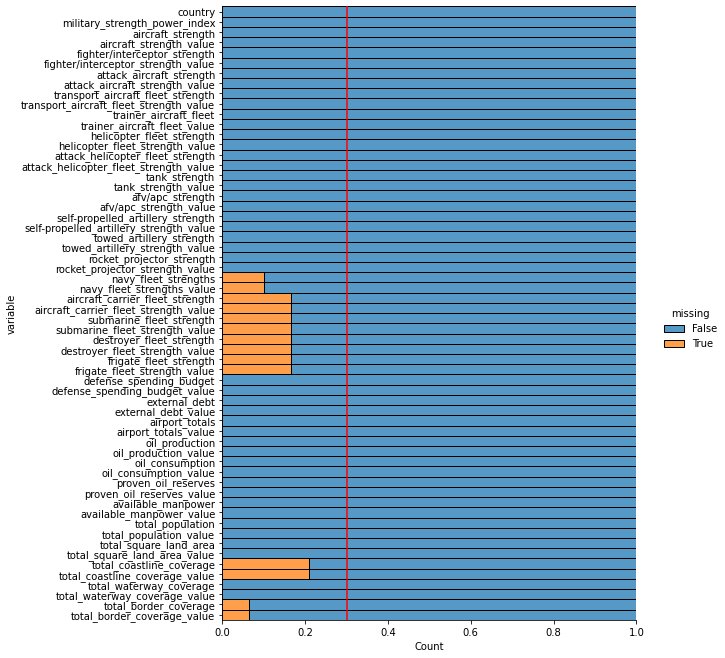

In [154]:
plt.figure(figsize=(4,6))

sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)

plt.axvline(0.3,color="r");

In [156]:
with pd.option_context('display.max_columns', None):
    display(df[df["total_coastline_coverage"].isna()])

country  military_strength_power_index  \
5                     Armenia                          2.125   
7                     Austria                          0.957   
11                    Belarus                          0.818   
13                     Bhutan                         10.168   
14                    Bolivia                          0.994   
16                   Botswana                          2.058   
19               Burkina Faso                          1.901   
23   Central African Republic                          3.289   
24                       Chad                          1.638   
30                    Czechia                          0.553   
38                   Ethiopia                          0.858   
48                    Hungary                          0.822   
62                 Kyrgyzstan                          1.924   
63                       Laos                          3.443   
71                       Mali                          1.894   
74                    Moldova                          2.129   
75                   Mongolia                          2.030   
81                      Nepal                          2.989   
85                      Niger                          2.015   
88            North Macedonia                          3.181   
93                   Paraguay                          2.190   
103                    Serbia                          0.948   
106                  Slovakia                          0.847   
111               South Sudan                          2.350   
117               Switzerland                          0.526   
120                Tajikistan                          1.866   
126                    Uganda                          1.618   
136                    Zambia                          1.646   
137                  Zimbabwe                          1.758   

            aircraft_strength aircraft_strength_value  \
5                     Armenia                      64   
7                     Austria                     120   
11                    Belarus                     202   
13                     Bhutan                       2   
14                    Bolivia                      69   
16                   Botswana                      45   
19               Burkina Faso                      16   
23   Central African Republic                       3   
24                       Chad                      35   
30                    Czechia                      95   
38                   Ethiopia                      86   
48                    Hungary                      47   
62                 Kyrgyzstan                       5   
63                       Laos                      33   
71                       Mali                      29   
74                    Moldova                       3   
75                   Mongolia                       9   
81                      Nepal                      16   
85                      Niger                      16   
88            North Macedonia                      20   
93                   Paraguay                      33   
103                    Serbia                     109   
106                  Slovakia                      47   
111               South Sudan                      19   
117               Switzerland                     169   
120                Tajikistan                      25   
126                    Uganda                      48   
136                    Zambia                     108   
137                  Zimbabwe                      90   

    fighter/interceptor_strength fighter/interceptor_strength_value  \
5                        Armenia                                  0   
7                        Austria                                 15   
11                       Belarus                                 39   
13                        Bhutan                                  0   
14                       Bolivia   

In [158]:
value_df.loc[value_df["total_coastline_coverage_value"].isnull(), ['country',
                                                                             'navy_fleet_strengths_value',
                                                                             'aircraft_carrier_fleet_strength_value',
                                                                             'submarine_fleet_strength_value',
                                                                             'destroyer_fleet_strength_value',
                                                                             'frigate_fleet_strength_value',
                                                                             'total_waterway_coverage_value']]

country  navy_fleet_strengths_value  \
5                     Armenia                       0.000   
7                     Austria                       0.000   
11                    Belarus                       0.000   
13                     Bhutan                       0.000   
14                    Bolivia                     173.000   
16                   Botswana                         NaN   
19               Burkina Faso                         NaN   
23   Central African Republic                         NaN   
24                       Chad                         NaN   
30                    Czechia                         NaN   
38                   Ethiopia                         NaN   
48                    Hungary                         NaN   
62                 Kyrgyzstan                         NaN   
63                       Laos                      36.000   
71                       Mali                         NaN   
74                    Moldova                         NaN   
75                   Mongolia                         NaN   
81                      Nepal                         NaN   
85                      Niger                         NaN   
88            North Macedonia                         NaN   
93                   Paraguay                      40.000   
103                    Serbia                      19.000   
106                  Slovakia                       0.000   
111               South Sudan                       0.000   
117               Switzerland                       0.000   
120                Tajikistan                       0.000   
126                    Uganda                       8.000   
136                    Zambia                       0.000   
137                  Zimbabwe                       0.000   

     aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
5                                      NaN                             NaN   
7                                      NaN                             NaN   
11                                     NaN                             NaN   
13                                     NaN                             NaN   
14                                   0.000                           0.000   
16                                     NaN                             NaN   
19                                     NaN                             NaN   
23                                     NaN                             NaN   
24                                     NaN                             NaN   
30                                     NaN                             NaN   
38                                     NaN                             NaN   
48                                     NaN                             NaN   
62                                     NaN                             NaN   
63                                   0.000                           0.000   
71                                     NaN                             NaN   
74                                     NaN                             NaN   
75                                     NaN                             NaN   
81                                     NaN                             NaN   
85                                     NaN                             NaN   
88                                     NaN                             NaN   
93                                   0.000                           0.000   
103                                  0.000                           0.000   
106                                    NaN                             NaN   
111                                  2.000                          22.000   
117                                    NaN                             NaN   
120                                    NaN                             NaN   
126                                  0.000                           0.000   
136    

In [159]:
value_df.loc[value_df["total_coastline_coverage_value"].isnull(),
    
    ['navy_fleet_strengths_value',
     'aircraft_carrier_fleet_strength_value',
     'submarine_fleet_strength_value',
     'destroyer_fleet_strength_value',
     'frigate_fleet_strength_value',
     'total_waterway_coverage_value']
    
    ] = 0

<Figure size 288x432 with 0 Axes>

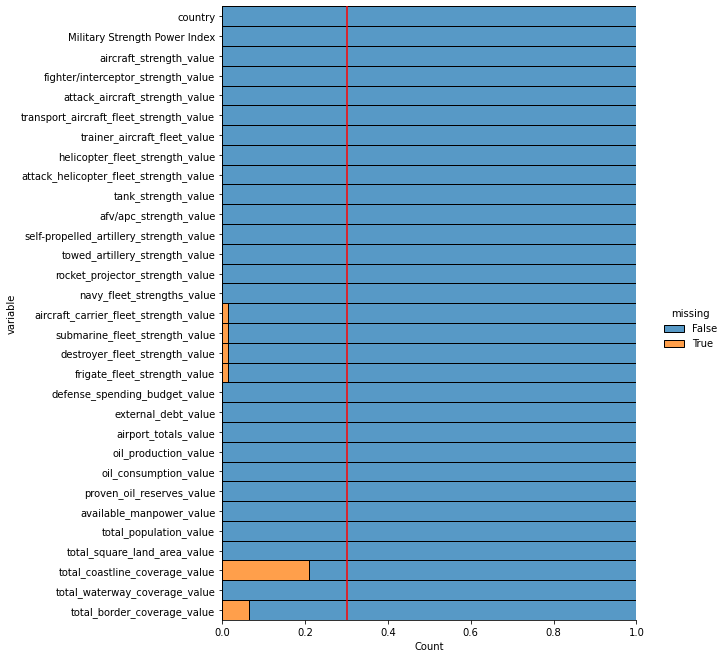

In [160]:
plt.figure(figsize=(4,6))

sns.displot(
    data=value_df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)

plt.axvline(0.3,color="r");

In [163]:
value_df.columns

Index(['country', 'Military Strength Power Index', 'aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value',
       'total_square_land_area_value', 'total_coastline_coverage_value

In [162]:
value_df.loc[value_df['aircraft_carrier_fleet_strength_value'].isnull()|
             value_df['submarine_fleet_strength_value'].isnull()|
             value_df['destroyer_fleet_strength_value'].isnull()|
             value_df['frigate_fleet_strength_value'].isnull()] 

country  Military Strength Power Index aircraft_strength_value  \
110  South Korea                          0.151                   1,649   
132   Uzbekistan                          0.809                     185   

    fighter/interceptor_strength_value  attack_aircraft_strength_value  \
110                                414                              71   
132                                 66                              20   

     transport_aircraft_fleet_strength_value trainer_aircraft_fleet_value  \
110                                       41                          298   
132                                       18                            2   

    helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
110                             803                                     112   
132                              79                                      25   

    tank_strength_value afv/apc_strength_value  \
110               2,614                 14,000   
132                 420                  1,215   

    self-propelled_artillery_strength_value towed_artillery_strength_value  \
110                                   3,040                          3,854   
132                                     137                              0   

    rocket_projector_strength_value  navy_fleet_strengths_value  \
110                             575                     234.000   
132                              98                       0.000   

     aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
110                                    NaN                             NaN   
132                                    NaN                             NaN   

     destroyer_fleet_strength_value  frigate_fleet_strength_value  \
110                             NaN                           NaN   
132                             NaN                           NaN   

    defense_spending_budget_value external_debt_value airport_totals_value  \
110               44,00,00,00,000   3,84,60,00,00,000                  111   
132                  97,50,00,000     16,90,00,00,000                   53   

    oil_production_value oil_consumption_value proven_oil_reserves_value  \
110                    0             28,00,000                         0   
132               46,070              1,42,000              59,40,00,000   

    available_manpower_value total_population_value  \
110              2,57,09,049            5,14,18,097   
132              1,59,12,566            3,00,23,709   

    total_square_land_area_value total_coastline_coverage_value  \
110                       99,720                          2,413   
132                     4,47,400                            420   

    total_waterway_coverage_value total_border_coverage_value  
110                         1,600                         237  
132                         1,100                       6,893

In [164]:
value_df.loc[value_df["country"] == "Uzbekistan",
            ['navy_fleet_strengths_value',
             'aircraft_carrier_fleet_strength_value',
             'submarine_fleet_strength_value',
             'destroyer_fleet_strength_value',
             'frigate_fleet_strength_value',
           ]] 

navy_fleet_strengths_value  aircraft_carrier_fleet_strength_value  \
132                       0.000                                    NaN   

     submarine_fleet_strength_value  destroyer_fleet_strength_value  \
132                             NaN                             NaN   

     frigate_fleet_strength_value  
132                           NaN

In [165]:
value_df.loc[value_df["country"] == "Uzbekistan",
            ['navy_fleet_strengths_value',
             'aircraft_carrier_fleet_strength_value',
             'submarine_fleet_strength_value',
             'destroyer_fleet_strength_value',
             'frigate_fleet_strength_value',
           ]] = 0

In [166]:
value_df.loc[value_df["country"] == "South Korea",
            ['navy_fleet_strengths_value',
             'aircraft_carrier_fleet_strength_value',
             'submarine_fleet_strength_value',
             'destroyer_fleet_strength_value',
             'frigate_fleet_strength_value',
           ]] 

navy_fleet_strengths_value  aircraft_carrier_fleet_strength_value  \
110                     234.000                                    NaN   

     submarine_fleet_strength_value  destroyer_fleet_strength_value  \
110                             NaN                             NaN   

     frigate_fleet_strength_value  
110                           NaN

In [168]:
value_df.loc[((value_df['navy_fleet_strengths_value'] > 200) & 
             (value_df['navy_fleet_strengths_value'] < 250)),
            ['country',
             'navy_fleet_strengths_value',
             'aircraft_carrier_fleet_strength_value',
             'submarine_fleet_strength_value',
             'destroyer_fleet_strength_value',
             'frigate_fleet_strength_value',
           ]] 

country  navy_fleet_strengths_value  \
2        Algeria                     201.000   
39       Finland                     246.000   
55         Italy                     249.000   
110  South Korea                     234.000   

     aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
2                                    0.000                           6.000   
39                                   0.000                           0.000   
55                                   2.000                           8.000   
110                                    NaN                             NaN   

     destroyer_fleet_strength_value  frigate_fleet_strength_value  
2                             0.000                         5.000  
39                            0.000                         0.000  
55                            4.000                        12.000  
110                             NaN                           NaN

In [170]:
value_df.loc[value_df["country"] == "France",
            ['country',
             'navy_fleet_strengths_value',
             'aircraft_carrier_fleet_strength_value',
             'submarine_fleet_strength_value',
             'destroyer_fleet_strength_value',
             'frigate_fleet_strength_value',
           ]] 

country  navy_fleet_strengths_value  aircraft_carrier_fleet_strength_value  \
40  France                     180.000                                  4.000   

    submarine_fleet_strength_value  destroyer_fleet_strength_value  \
40                           9.000                          11.000   

    frigate_fleet_strength_value  
40                        11.000

In [171]:
# All the numbers derived from South Korea Navy wikipeida page

value_df.loc[value_df["country"] == "South Korea",'aircraft_carrier_fleet_strength_value'] = 2
value_df.loc[value_df["country"] == "South Korea",'submarine_fleet_strength_value'] = 19
value_df.loc[value_df["country"] == "South Korea",'destroyer_fleet_strength_value'] = 12
value_df.loc[value_df["country"] == "South Korea",'frigate_fleet_strength_value'] = 12

<Figure size 288x432 with 0 Axes>

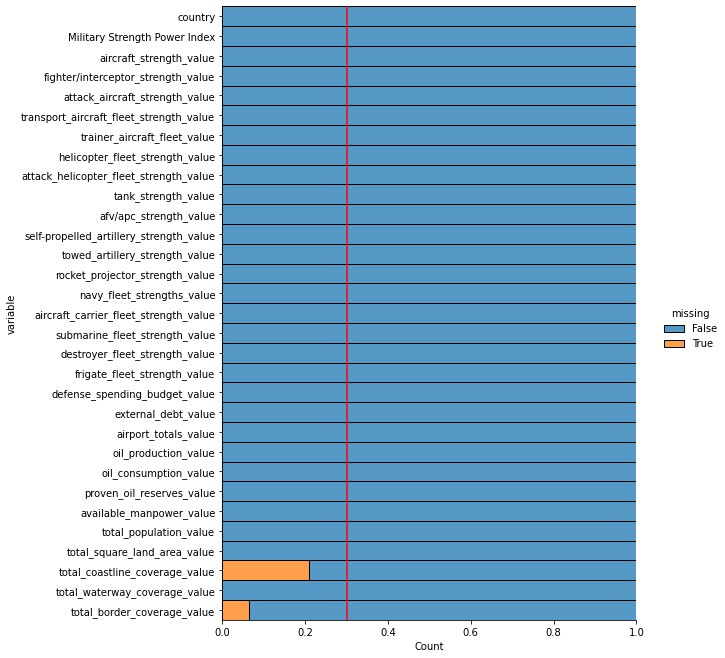

In [172]:
plt.figure(figsize=(4,6))

sns.displot(
    data=value_df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)

plt.axvline(0.3,color="r");

In [173]:
value_df.loc[value_df['total_coastline_coverage_value'].isnull()]

country  Military Strength Power Index  \
5                     Armenia                          2.125   
7                     Austria                          0.957   
11                    Belarus                          0.818   
13                     Bhutan                         10.168   
14                    Bolivia                          0.994   
16                   Botswana                          2.058   
19               Burkina Faso                          1.901   
23   Central African Republic                          3.289   
24                       Chad                          1.638   
30                    Czechia                          0.553   
38                   Ethiopia                          0.858   
48                    Hungary                          0.822   
62                 Kyrgyzstan                          1.924   
63                       Laos                          3.443   
71                       Mali                          1.894   
74                    Moldova                          2.129   
75                   Mongolia                          2.030   
81                      Nepal                          2.989   
85                      Niger                          2.015   
88            North Macedonia                          3.181   
93                   Paraguay                          2.190   
103                    Serbia                          0.948   
106                  Slovakia                          0.847   
111               South Sudan                          2.350   
117               Switzerland                          0.526   
120                Tajikistan                          1.866   
126                    Uganda                          1.618   
136                    Zambia                          1.646   
137                  Zimbabwe                          1.758   

    aircraft_strength_value fighter/interceptor_strength_value  \
5                        64                                  0   
7                       120                                 15   
11                      202                                 39   
13                        2                                  0   
14                       69                                  0   
16                       45                                 10   
19                       16                                  0   
23                        3                                  0   
24                       35                                  0   
30                       95                                 12   
38                       86                                 24   
48                       47                                 12   
62                        5                                  0   
63                       33                                  0   
71                       29                                  9   
74                        3                                  0   
75                        9                                  0   
81                       16                                  0   
85                       16                                  0   
88                       20                                  0   
93                       33                                  0   
103                     109                                  9   
106                      47                                 10   
111                      19                                  0   
117                     169                                 54   
120                      25                                  0   
126                      48                                 10   
136                     108                                 18   
137                      90                                 10   

     attack_aircraft_strength_value  transport_aircraft_fleet_strength_value  \
5                                 9     

In [174]:
value_df.loc[value_df['total_coastline_coverage_value'].isnull(), 
                      'total_coastline_coverage_value']  = 0 

In [176]:
value_df.loc[value_df['total_border_coverage_value'].isnull()]

country  Military Strength Power Index aircraft_strength_value  \
6      Australia                          0.323                     464   
9        Bahrain                          1.855                     109   
57         Japan                          0.150                   1,561   
69    Madagascar                          3.087                       6   
83   New Zealand                          1.368                      48   
95   Philippines                          0.785                     171   
105    Singapore                          0.797                     235   
113    Sri Lanka                          1.466                      77   
119       Taiwan                          0.401                     744   

    fighter/interceptor_strength_value  attack_aircraft_strength_value  \
6                                   82                               6   
9                                   17                               0   
57                                 279                              12   
69                                   0                               0   
83                                   0                               0   
95                                   0                              19   
105                                100                               0   
113                                  0                               0   
119                                289                               0   

     transport_aircraft_fleet_strength_value trainer_aircraft_fleet_value  \
6                                         38                          174   
9                                          2                           37   
57                                        60                          427   
69                                         0                            0   
83                                         7                           13   
95                                        23                           24   
105                                        9                           36   
113                                       15                            6   
119                                       19                          207   

    helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
6                               133                                      22   
9                                65                                      22   
57                              637                                     119   
69                                6                                       0   
83                               22                                       0   
95                               97                                       0   
105                              77                                      17   
113                              54                                       9   
119                             210                                      91   

    tank_strength_value afv/apc_strength_value  \
6                    59                  3,051   
9                   180                    843   
57                1,004                  3,130   
69                   12                    103   
83                    0                    200   
95                    7                    513   
105                 180                  3,000   
113                 202                    570   
119               1,180                  2,000   

    self-propelled_artillery_strength_value towed_artillery_strength_value  \
6                                         0                             54   
9                                        33                             26   
57                                      238                            500   
69                                        0                             25   
83                                        0                     

In [177]:
value_df.loc[value_df['total_border_coverage_value'].isnull(), 
                      'total_border_coverage_value' ] = 0

<Figure size 288x432 with 0 Axes>

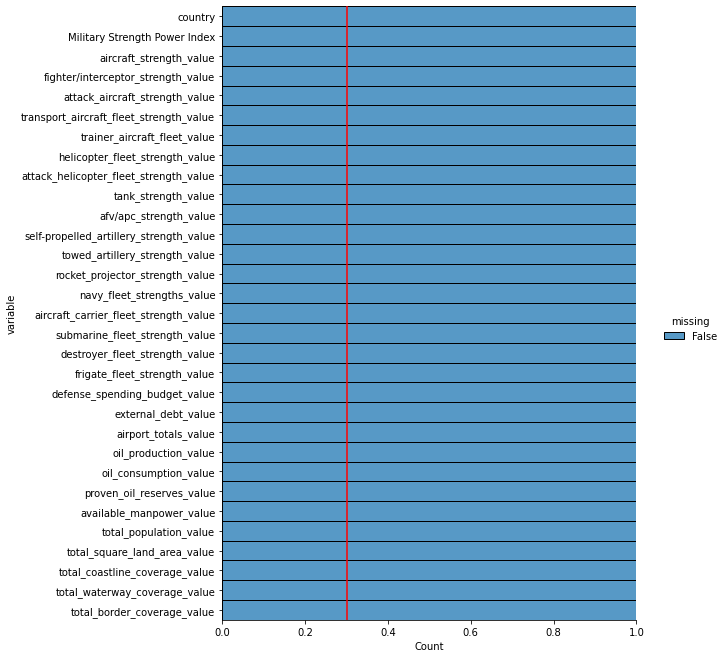

In [178]:
plt.figure(figsize=(4,6))

sns.displot(
    data=value_df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)

plt.axvline(0.3,color="r");

In [179]:
value_df.reset_index(drop=True, inplace=True)

In [180]:
value_df

country  Military Strength Power Index  \
0                         Afghanistan                          1.344   
1                             Albania                          2.314   
2                             Algeria                          0.466   
3                              Angola                          0.838   
4                           Argentina                          0.652   
5                             Armenia                          2.125   
6                           Australia                          0.323   
7                             Austria                          0.957   
8                          Azerbaijan                          0.946   
9                             Bahrain                          1.855   
10                         Bangladesh                          0.707   
11                            Belarus                          0.818   
12                            Belgium                          1.050   
13                             Bhutan                         10.168   
14                            Bolivia                          0.994   
15             Bosnia and Herzegovina                          3.859   
16                           Botswana                          2.058   
17                             Brazil                          0.199   
18                           Bulgaria                          0.892   
19                       Burkina Faso                          1.901   
20                           Cambodia                          2.056   
21                           Cameroon                          1.990   
22                             Canada                          0.371   
23           Central African Republic                          3.289   
24                               Chad                          1.638   
25                              Chile                          0.767   
26                              China                          0.069   
27                           Colombia                          0.605   
28                            Croatia                          1.018   
29                               Cuba                          1.221   
30                            Czechia                          0.553   
31   Democratic Republic of the Congo                          1.139   
32                            Denmark                          0.788   
33                 Dominican Republic                          2.750   
34                            Ecuador                          1.006   
35                              Egypt                          0.187   
36                        El Salvador                          3.129   
37                            Estonia                          2.589   
38                           Ethiopia                          0.858   
39                            Finland                          0.850   
40                             France                          0.170   
41                              Gabon                          3.374   
42                            Georgia                          1.668   
43                            Germany                          0.219   
44                              Ghana                          2.055   
45                             Greece                          0.531   
46                          Guatemala                          1.830   
47                           Honduras                          2.094   
48                            Hungary                          0.822   
49                              India                          0.095   
50                          Indonesia                          0.254   
51                               Iran                          0.219   
52                               Iraq                          0.791   
53                            Ireland                          1.948   
54                             Israel                          0.311  

<a id="4.4"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">Handling With Data Types</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [185]:
value_df.dtypes

country                                     object
Military Strength Power Index              float64
aircraft_strength_value                     object
fighter/interceptor_strength_value          object
attack_aircraft_strength_value               int64
transport_aircraft_fleet_strength_value      int64
trainer_aircraft_fleet_value                object
helicopter_fleet_strength_value             object
attack_helicopter_fleet_strength_value       int64
tank_strength_value                         object
afv/apc_strength_value                      object
self-propelled_artillery_strength_value     object
towed_artillery_strength_value              object
rocket_projector_strength_value             object
navy_fleet_strengths_value                 float64
aircraft_carrier_fleet_strength_value      float64
submarine_fleet_strength_value             float64
destroyer_fleet_strength_value             float64
frigate_fleet_strength_value               float64
defense_spending_budget_value  

In [182]:
value_df.select_dtypes("object")

country aircraft_strength_value  \
0                         Afghanistan                     260   
1                             Albania                      19   
2                             Algeria                     551   
3                              Angola                     295   
4                           Argentina                     227   
5                             Armenia                      64   
6                           Australia                     464   
7                             Austria                     120   
8                          Azerbaijan                     147   
9                             Bahrain                     109   
10                         Bangladesh                     177   
11                            Belarus                     202   
12                            Belgium                     148   
13                             Bhutan                       2   
14                            Bolivia                      69   
15             Bosnia and Herzegovina                      19   
16                           Botswana                      45   
17                             Brazil                     715   
18                           Bulgaria                      63   
19                       Burkina Faso                      16   
20                           Cambodia                      22   
21                           Cameroon                      29   
22                             Canada                     385   
23           Central African Republic                       3   
24                               Chad                      35   
25                              Chile                     282   
26                              China                   3,210   
27                           Colombia                     469   
28                            Croatia                      78   
29                               Cuba                      80   
30                            Czechia                      95   
31   Democratic Republic of the Congo                      53   
32                            Denmark                     113   
33                 Dominican Republic                      49   
34                            Ecuador                     108   
35                              Egypt                   1,054   
36                        El Salvador                      51   
37                            Estonia                       7   
38                           Ethiopia                      86   
39                            Finland                     194   
40                             France                   1,229   
41                              Gabon                      23   
42                            Georgia                      66   
43                            Germany                     712   
44                              Ghana                      24   
45                             Greece                     566   
46                          Guatemala                      33   
47                           Honduras                      46   
48                            Hungary                      47   
49                              India                   2,123   
50                          Indonesia                     462   
51                               Iran                     509   
52                               Iraq                     348   
53                            Ireland                      19   
54                             Israel                     589   
55                              Italy                     860   
56                        Ivory Coast                       8   
57                              Japan                   1,561   
58                             Jordan                     278   
59                         Kazakhstan                     222   
60                              Kenya                     150   


In [188]:
value_df = value_df.reset_index()   # df = df.reset_index(drop = True)
del value_df['index']

In [197]:
value_df.set_index('country', inplace=True)

In [198]:
for col in value_df.columns:
    if value_df.dtypes[col] == np.object:
        value_df[col] = value_df[col].apply(lambda x : x.replace(",", "") if type(x) != int else x).astype("float")

In [199]:
value_df.head()

Military Strength Power Index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                  260.000   
Albania                              2.314                   19.000   
Algeria                              0.466                  551.000   
Angola                               0.838                  295.000   
Argentina                            0.652                  227.000   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                               0.000   
Albania                                   0.000   
Algeria                                 103.000   
Angola                                   72.000   
Argentina                                24.000   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   
Albania                                   0   
Algeria                                  22   
Angola                                   18   
Argentina                                 7   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   
Albania                                            0   
Algeria                                           59   
Angola                                            30   
Argentina                                          9   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                         0.000                          187.000   
Albania                             0.000                           19.000   
Algeria                            87.000                          257.000   
Angola                             47.000                          126.000   
Argentina                          64.000                          100.000   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                       0                0.000   
Albania                                           0                0.000   
Algeria                                          45              880.000   
Angola                                           15              379.000   
Argentina                                         0              370.000   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                1062.000                                    0.000   
Albania                     467.000                                    0.000   
Algeria                    7361.000                                  320.000   
Angola                      595.000                                   28.000   
Argentina                   739.000                                   83.000   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                         176.000                           50.000   
Albania                               0.000                            0.000   
Algeria                             240.000                          316.000   
Angola                              357.000                          115.000   
Argentina                           172.000                           26.000   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   
Albania                          38.000   
Algeria                         201.000   
Angola           

In [200]:
value_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   aircraft_strength_value                  138 non-null    float64
 2   fighter/interceptor_strength_value       138 non-null    float64
 3   attack_aircraft_strength_value           138 non-null    int64  
 4   transport_aircraft_fleet_strength_value  138 non-null    int64  
 5   trainer_aircraft_fleet_value             138 non-null    float64
 6   helicopter_fleet_strength_value          138 non-null    float64
 7   attack_helicopter_fleet_strength_value   138 non-null    int64  
 8   tank_strength_value                      138 non-null    float64
 9   afv/apc_strength_value                   138 non-null    float64
 10  self-propelled_artillery_strength_value 

In [201]:
missing(value_df)

Missing_Number  Missing_Percent
Military Strength Power Index                         0            0.000
aircraft_strength_value                               0            0.000
total_waterway_coverage_value                         0            0.000
total_coastline_coverage_value                        0            0.000
total_square_land_area_value                          0            0.000
total_population_value                                0            0.000
available_manpower_value                              0            0.000
proven_oil_reserves_value                             0            0.000
oil_consumption_value                                 0            0.000
oil_production_value                                  0            0.000
airport_totals_value                                  0            0.000
external_debt_value                                   0            0.000
defense_spending_budget_value                         0            0.000
frigate_fleet_strength_value                          0            0.000
destroyer_fleet_strength_value                        0            0.000
submarine_fleet_strength_value                        0            0.000
aircraft_carrier_fleet_strength_value                 0            0.000
navy_fleet_strengths_value                            0            0.000
rocket_projector_strength_value                       0            0.000
towed_artillery_strength_value                        0            0.000
self-propelled_artillery_strength_value               0            0.000
afv/apc_strength_value                                0            0.000
tank_strength_value                                   0            0.000
attack_helicopter_fleet_strength_value                0            0.000
helicopter_fleet_strength_value                       0            0.000
trainer_aircraft_fleet_value                          0            0.000
transport_aircraft_fleet_strength_value               0            0.000
attack_aircraft_strength_value                        0            0.000
fighter/interceptor_strength_value                    0            0.000
total_border_coverage_value                           0            0.000

<a id="4.5"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">The Selection of Features</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**We will drop the features that do NOT affect military power**

* Hint-1,  Georeferences not proper features

In [202]:
value_df.columns

Index(['Military Strength Power Index', 'aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value',
       'total_square_land_area_value', 'total_coastline_coverage_value',
       '

In [ ]:
# Georeferences

# "total_coastline_coverage_value"
# "total_waterway_coverage_value"
# "total_border_coverage_value"
# "total_square_land_area_value"

In [203]:
value_df.drop(['total_square_land_area_value',
               'total_coastline_coverage_value',
               'total_waterway_coverage_value',
               'total_border_coverage_value'], axis=1, inplace=True)

In [204]:
value_df.shape

(138, 26)

<a id="4.6"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">The Visualization of Some Features</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**Let's visualize some features for a better understanding of the data**

In [206]:
value_df.head()

Military Strength Power Index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                  260.000   
Albania                              2.314                   19.000   
Algeria                              0.466                  551.000   
Angola                               0.838                  295.000   
Argentina                            0.652                  227.000   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                               0.000   
Albania                                   0.000   
Algeria                                 103.000   
Angola                                   72.000   
Argentina                                24.000   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   
Albania                                   0   
Algeria                                  22   
Angola                                   18   
Argentina                                 7   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   
Albania                                            0   
Algeria                                           59   
Angola                                            30   
Argentina                                          9   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                         0.000                          187.000   
Albania                             0.000                           19.000   
Algeria                            87.000                          257.000   
Angola                             47.000                          126.000   
Argentina                          64.000                          100.000   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                       0                0.000   
Albania                                           0                0.000   
Algeria                                          45              880.000   
Angola                                           15              379.000   
Argentina                                         0              370.000   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                1062.000                                    0.000   
Albania                     467.000                                    0.000   
Algeria                    7361.000                                  320.000   
Angola                      595.000                                   28.000   
Argentina                   739.000                                   83.000   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                         176.000                           50.000   
Albania                               0.000                            0.000   
Algeria                             240.000                          316.000   
Angola                              357.000                          115.000   
Argentina                           172.000                           26.000   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   
Albania                          38.000   
Algeria                         201.000   
Angola           

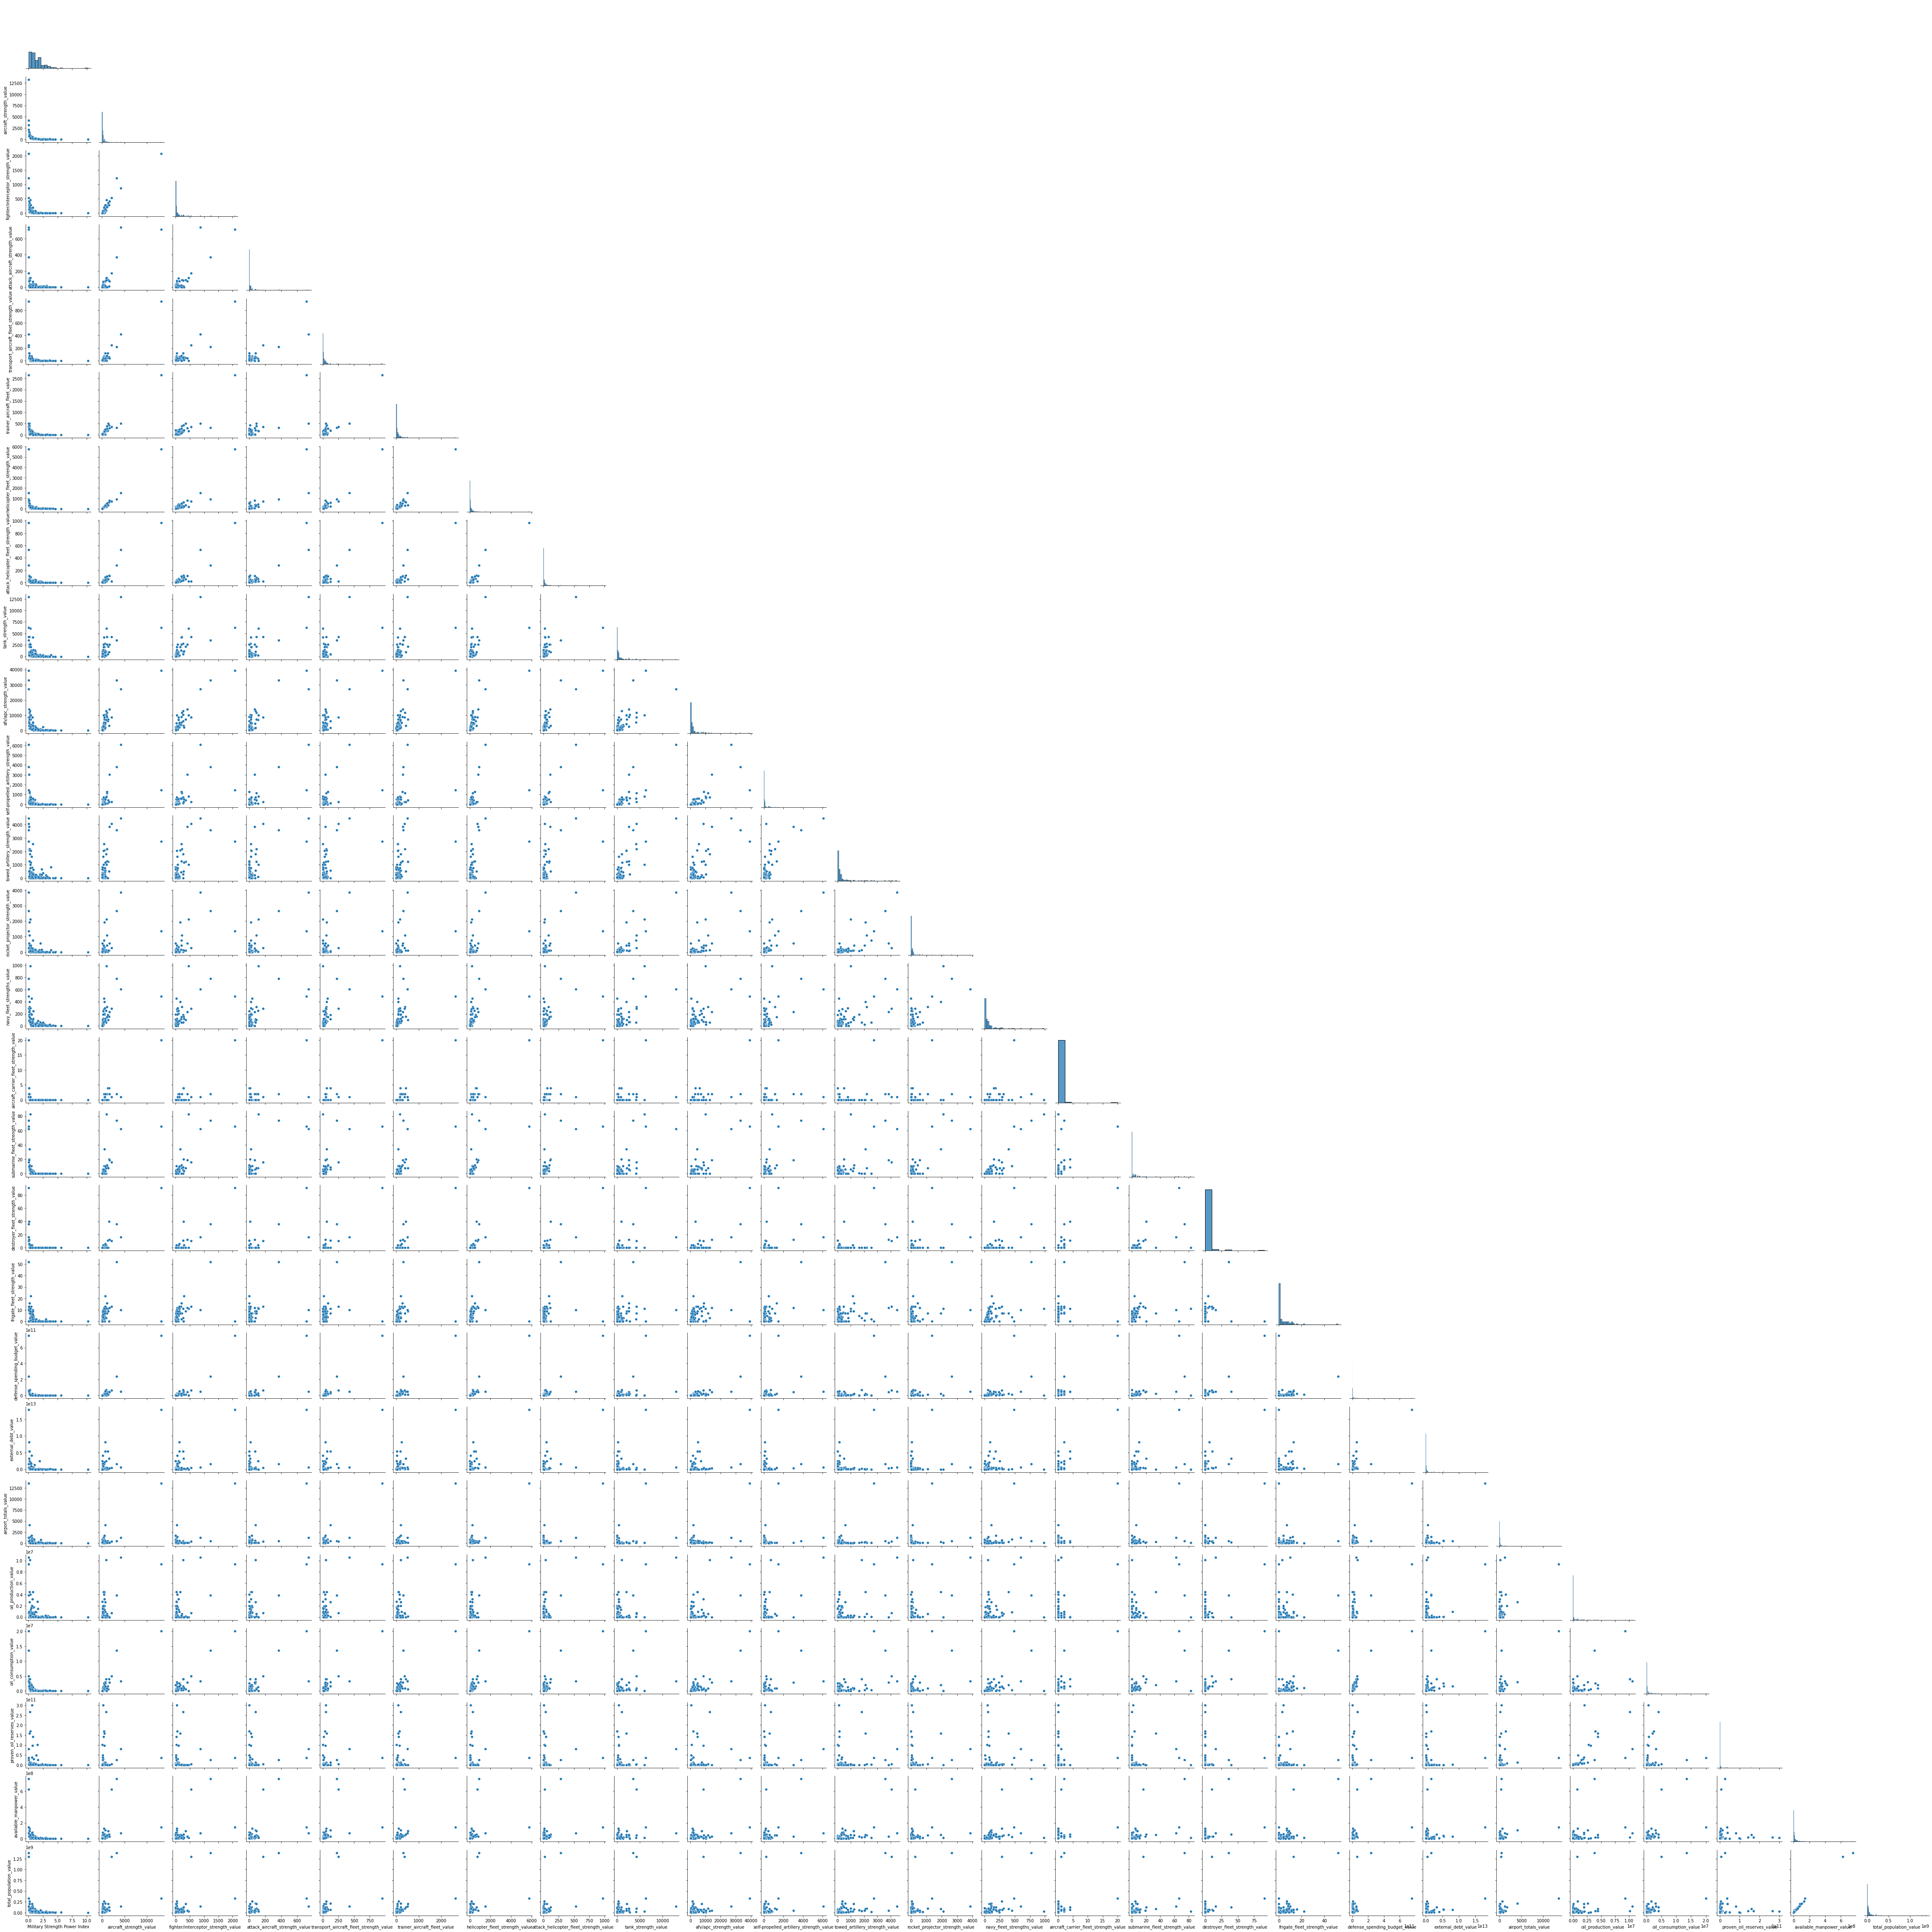

In [207]:
sns.pairplot(value_df, palette="inferno", corner=True);

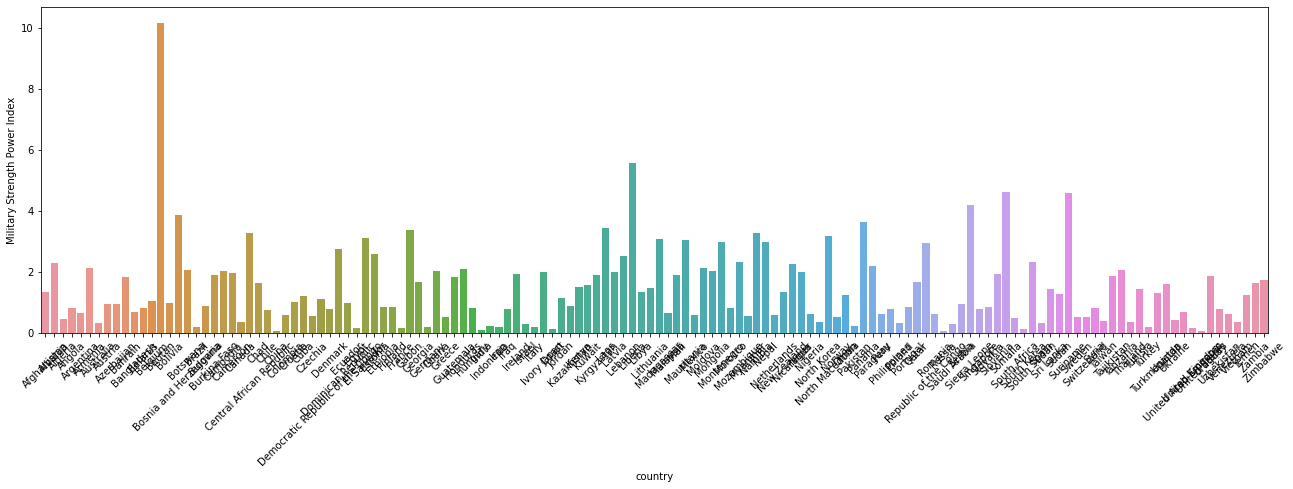

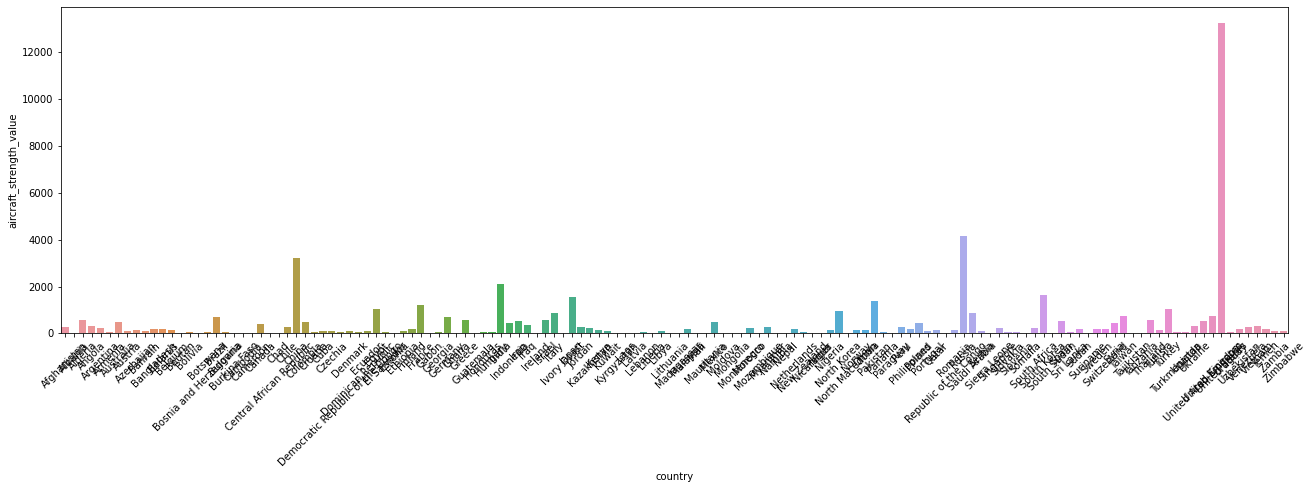

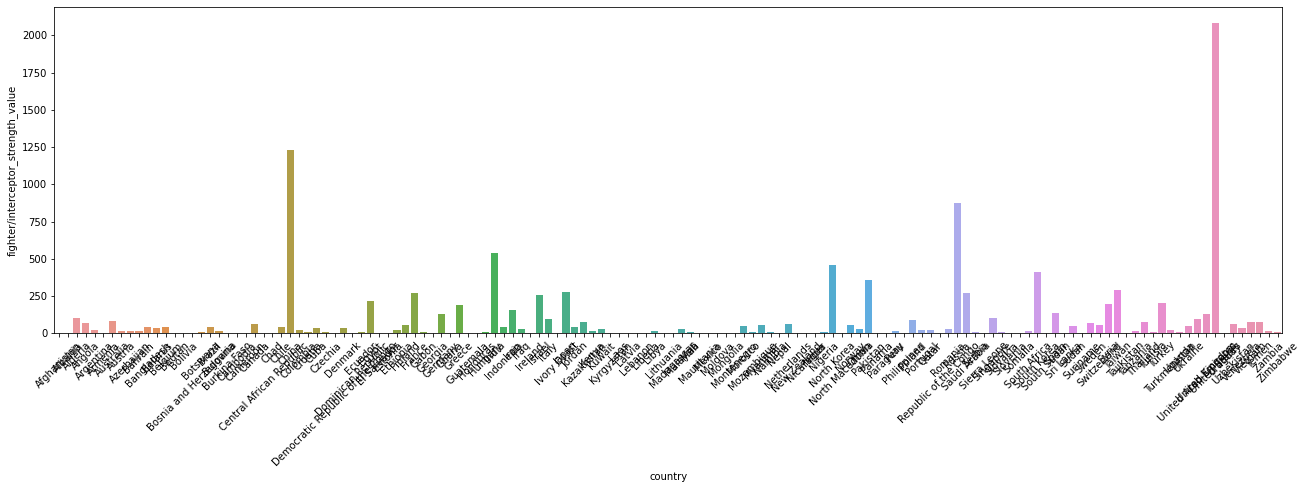

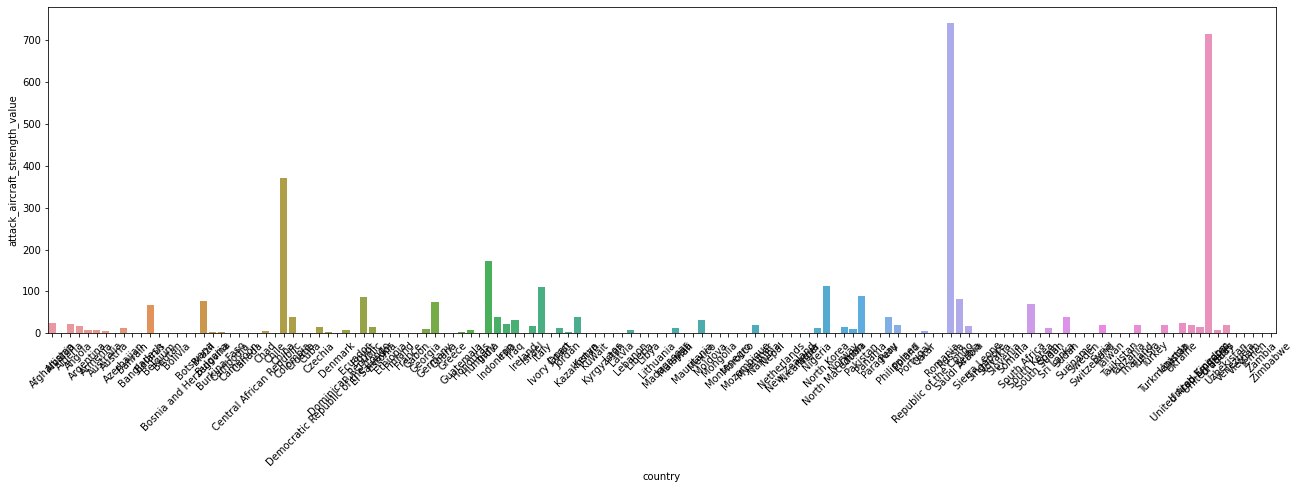

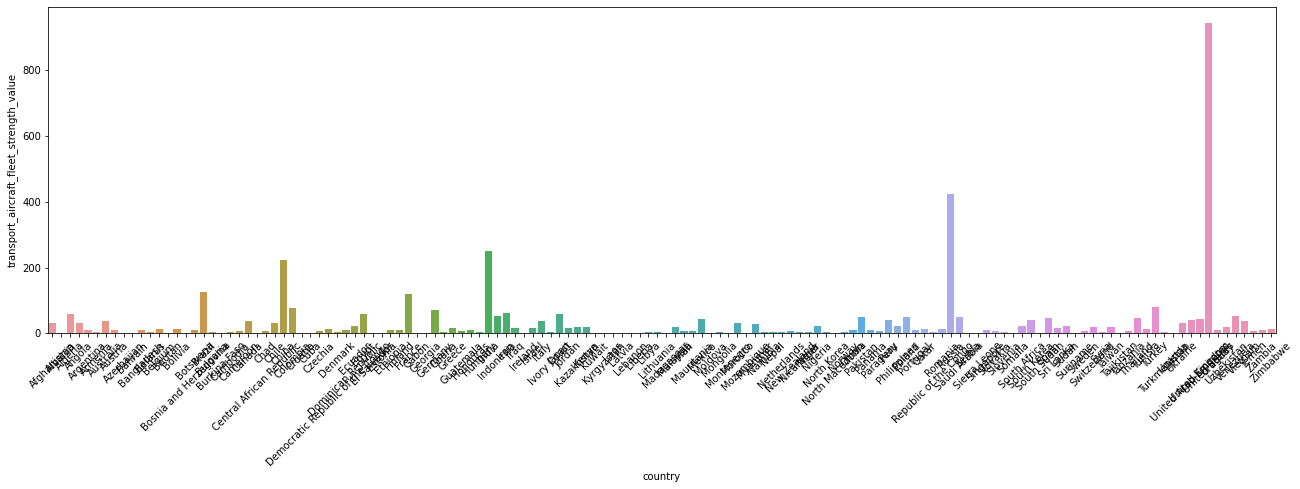

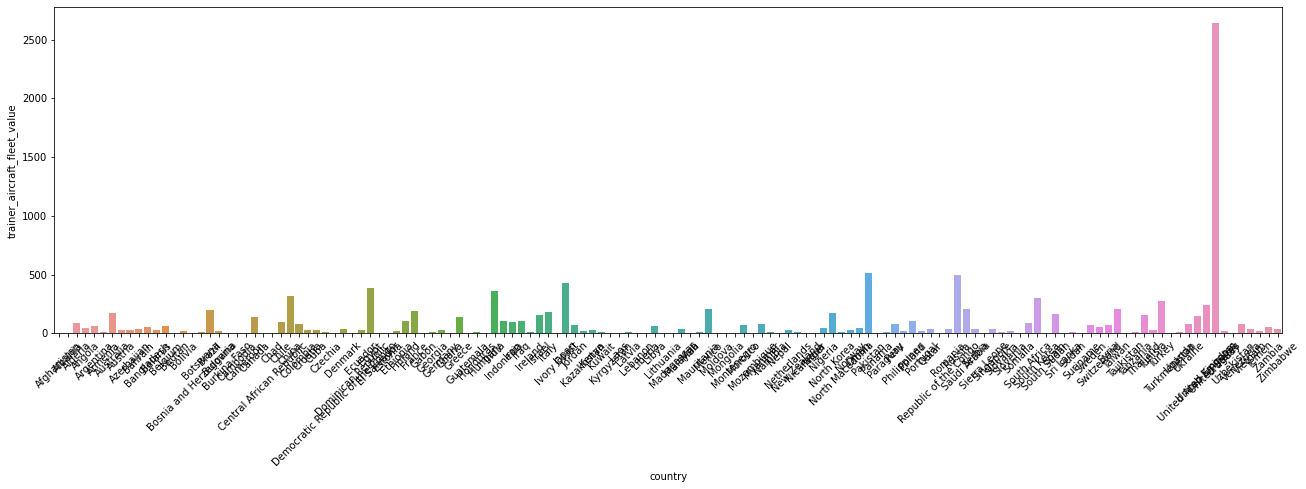

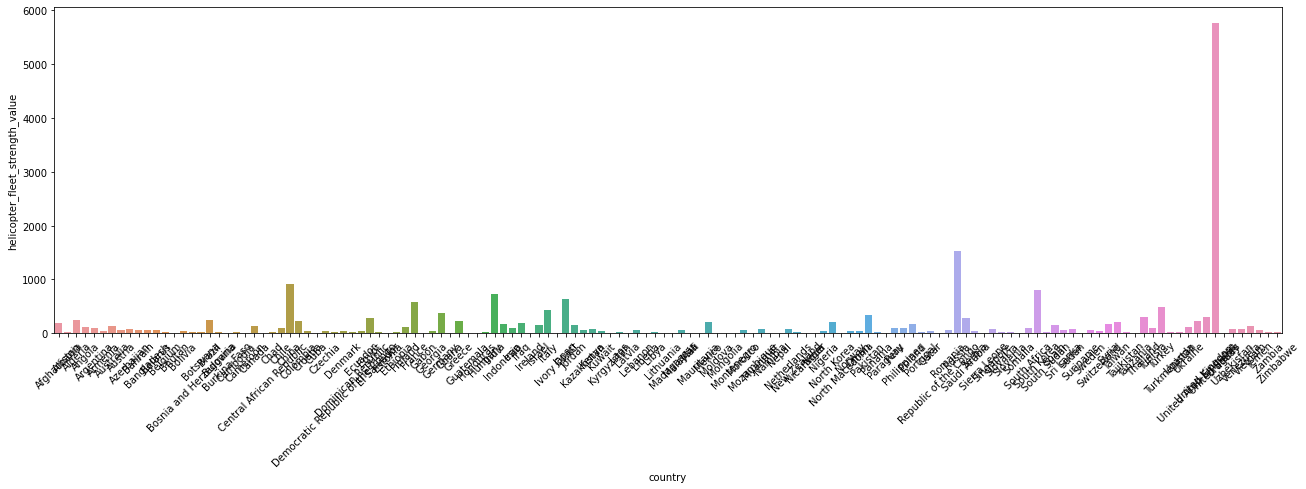

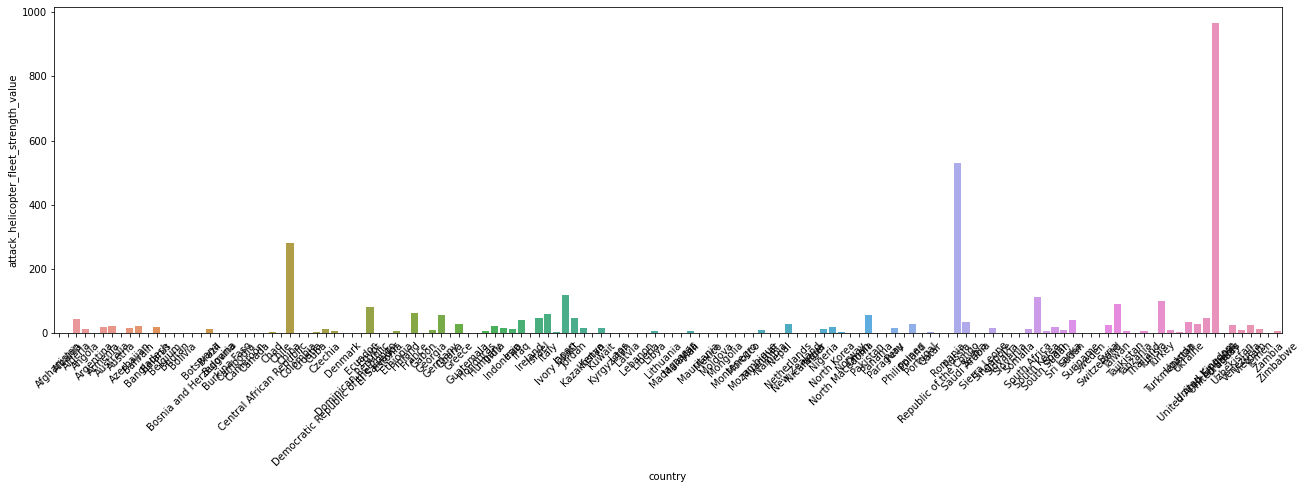

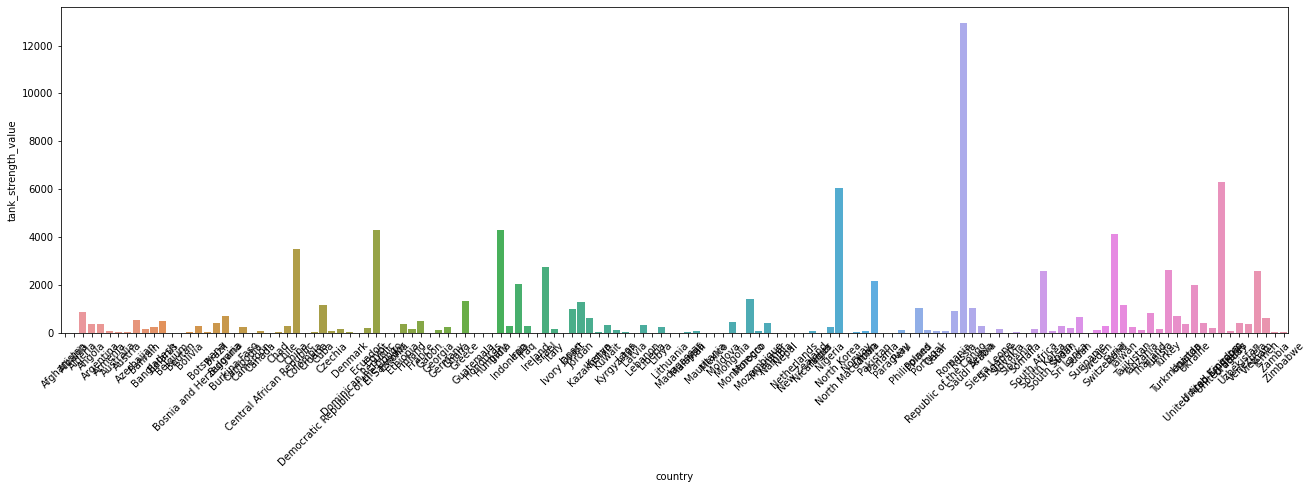

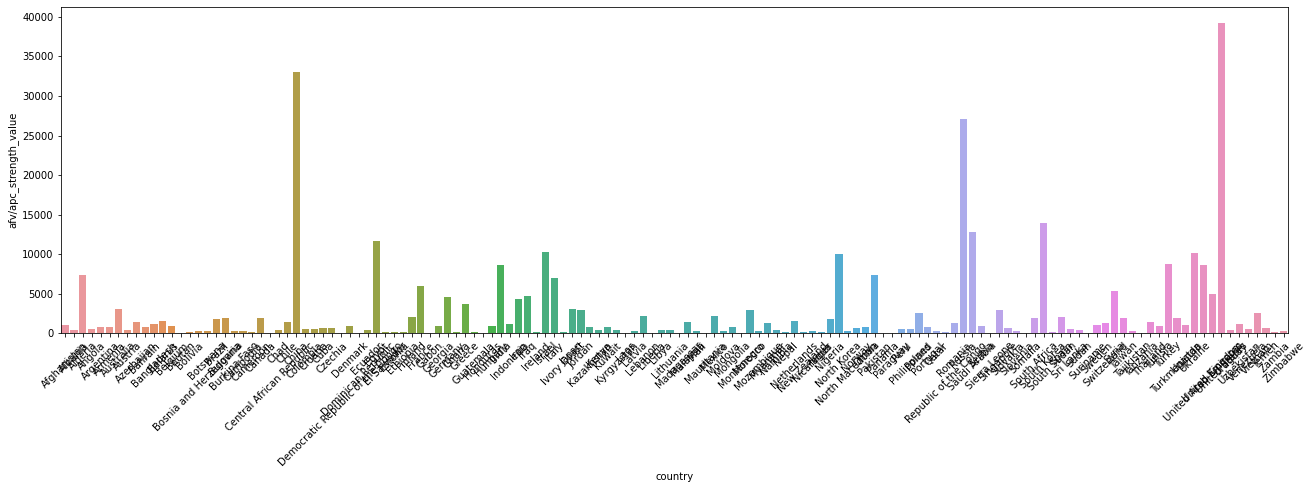

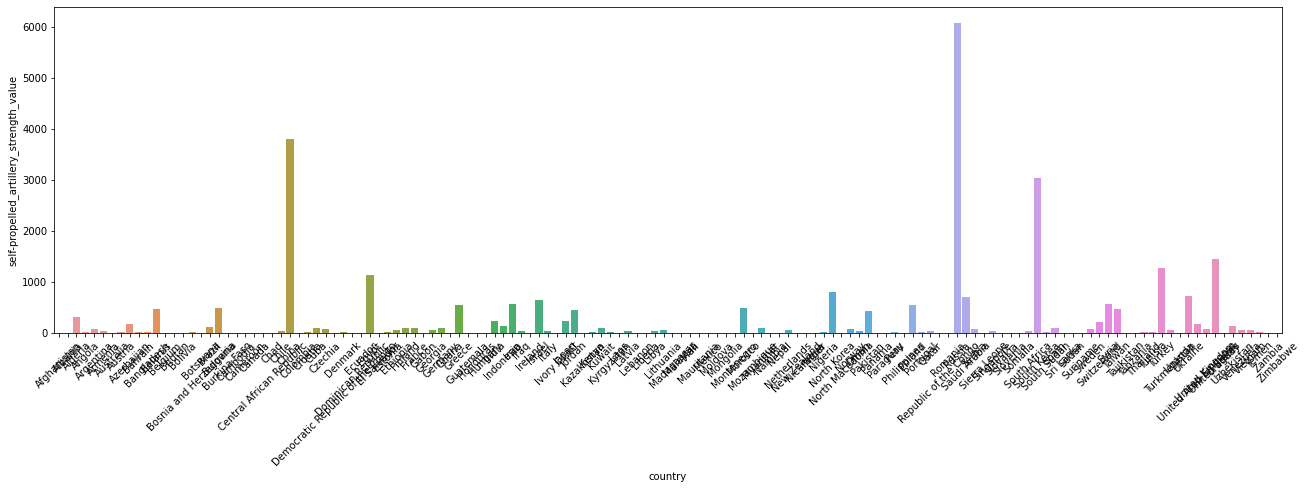

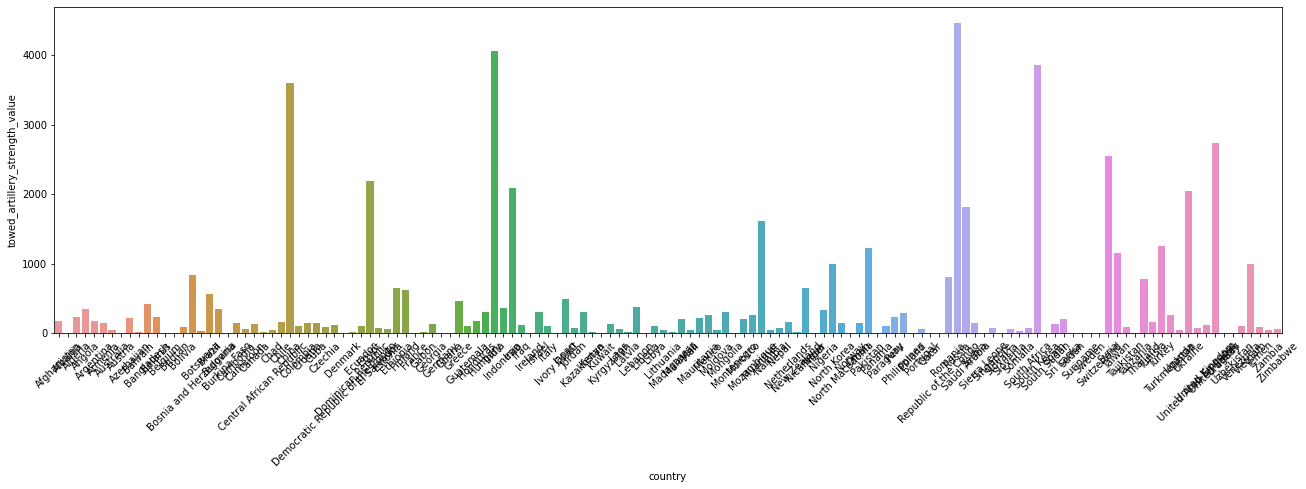

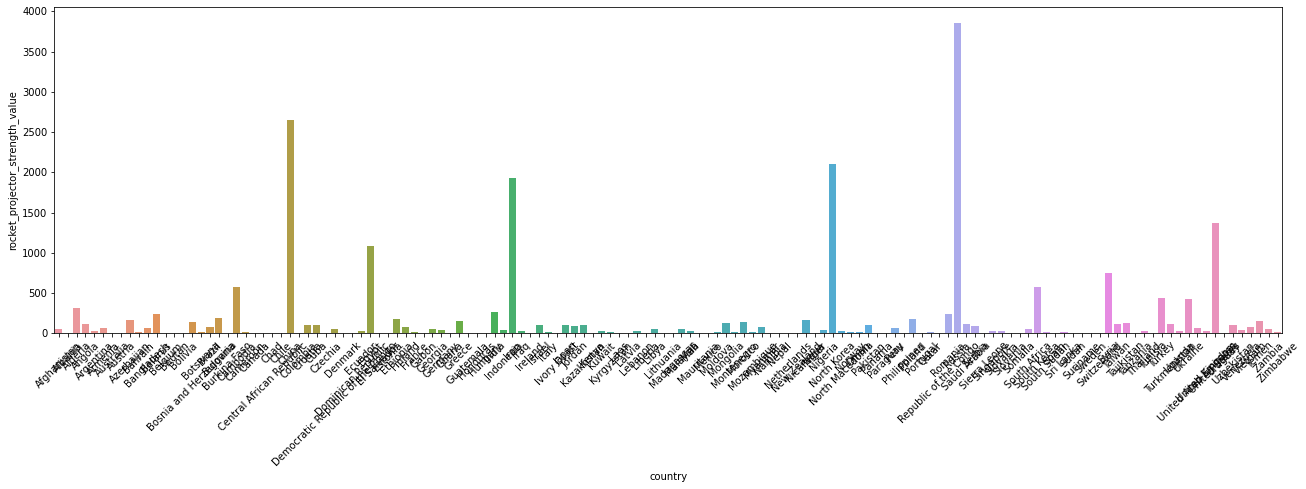

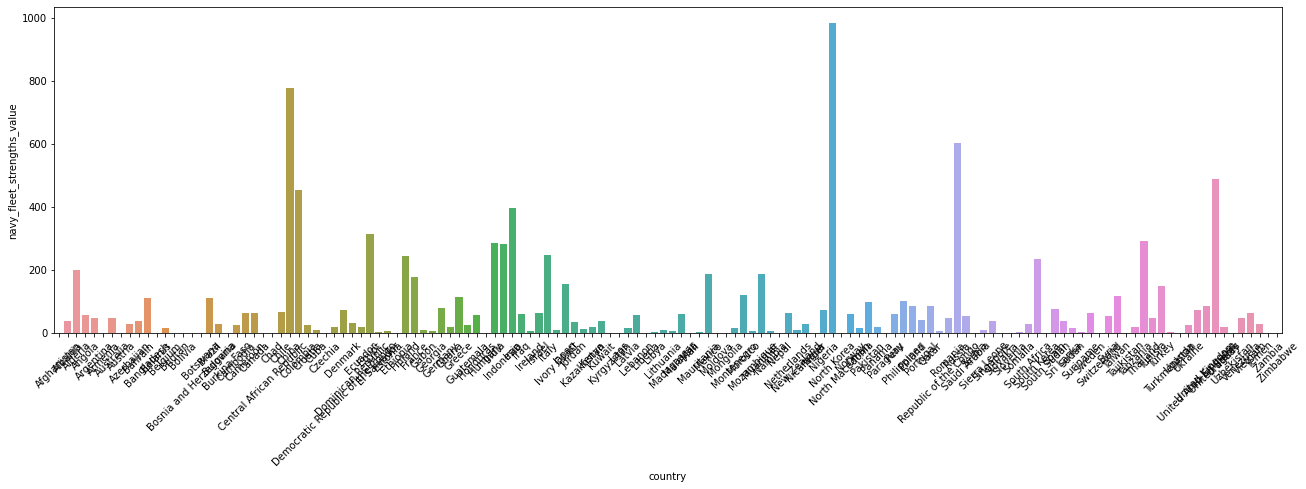

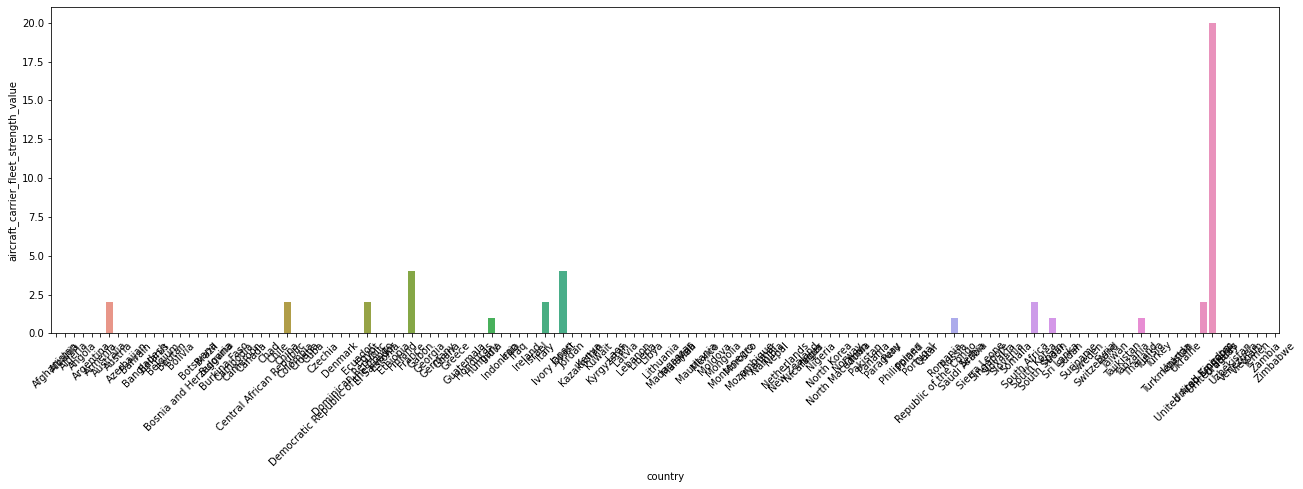

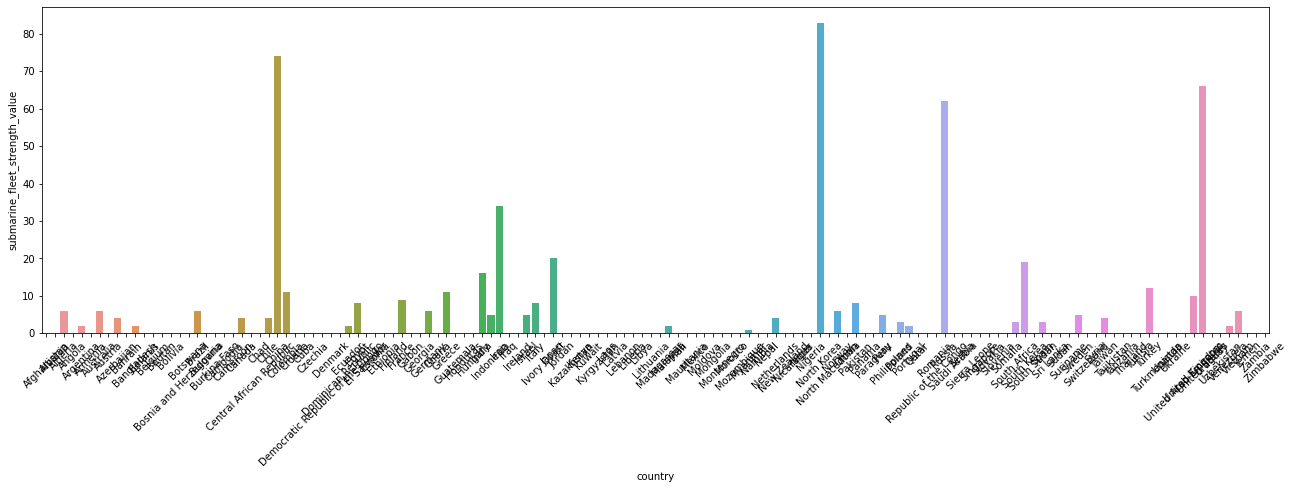

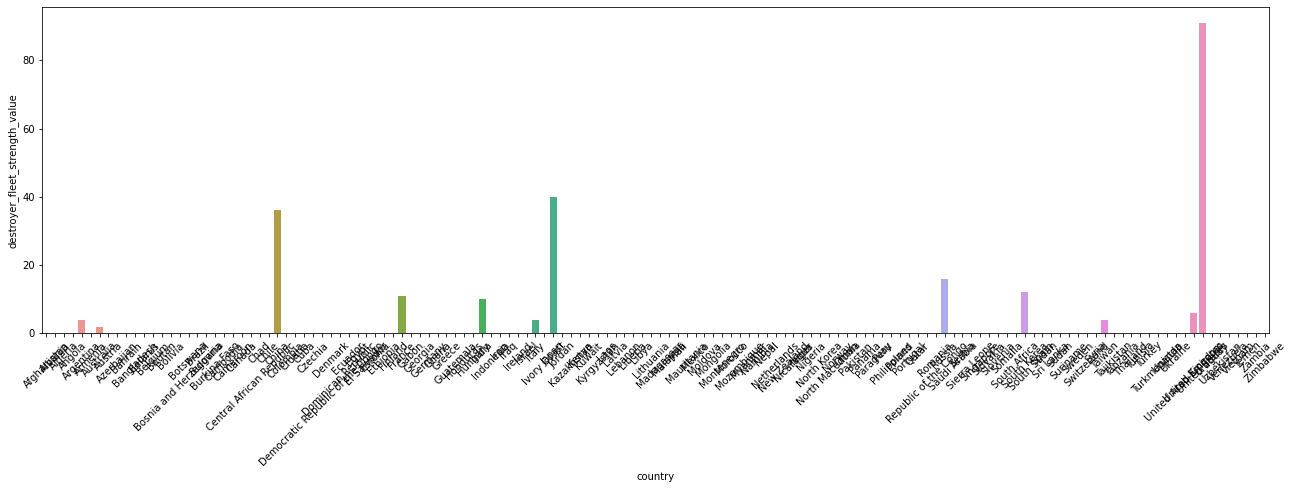

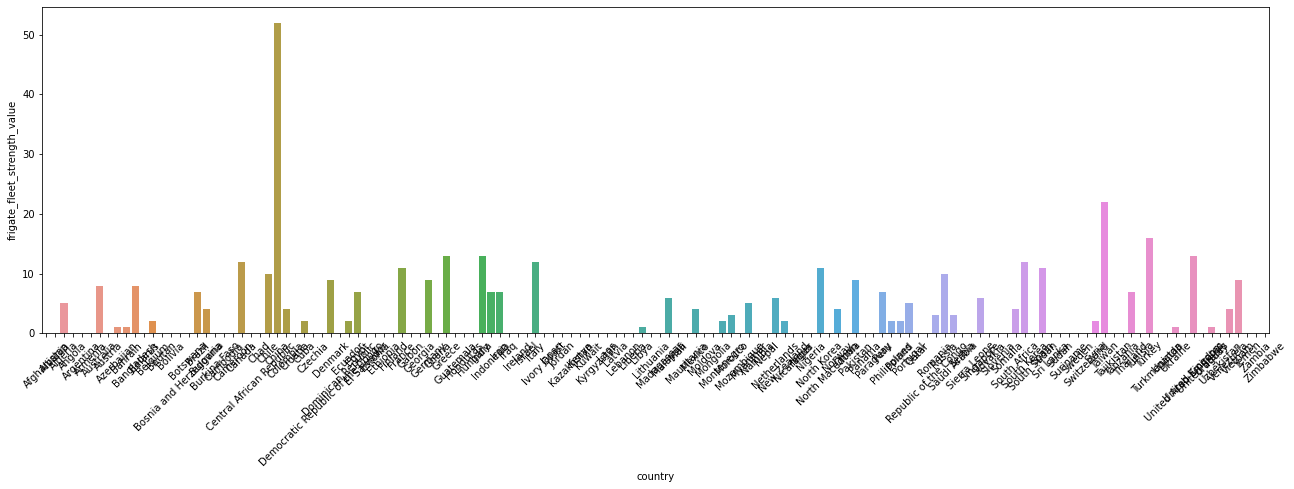

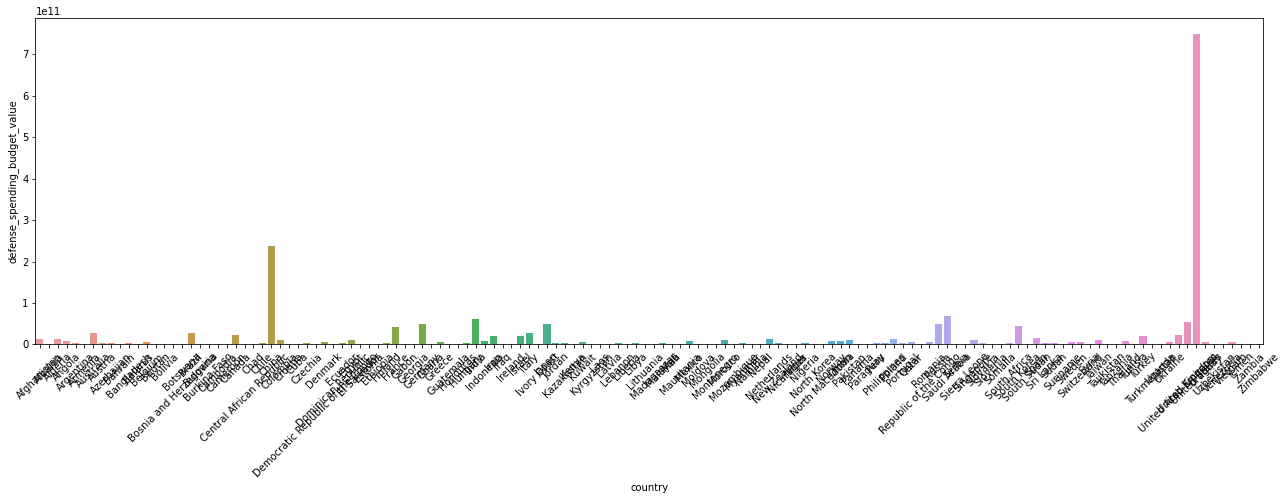

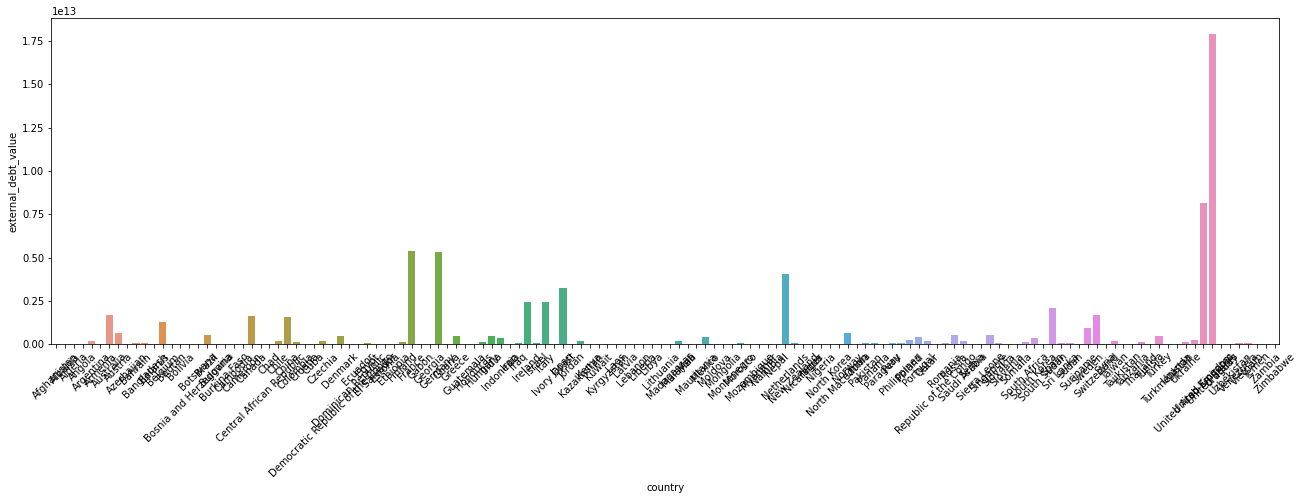

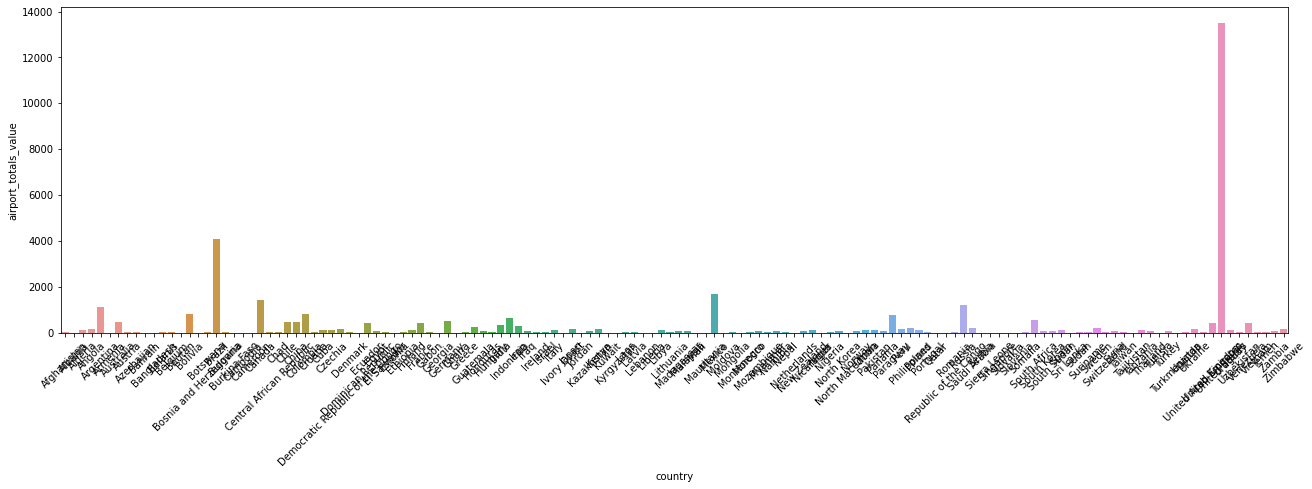

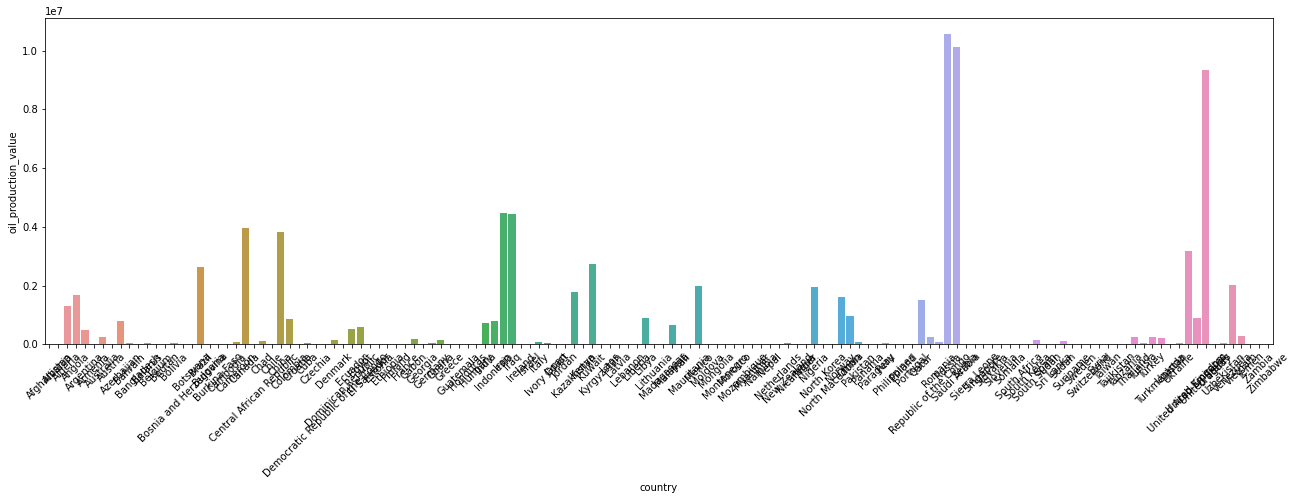

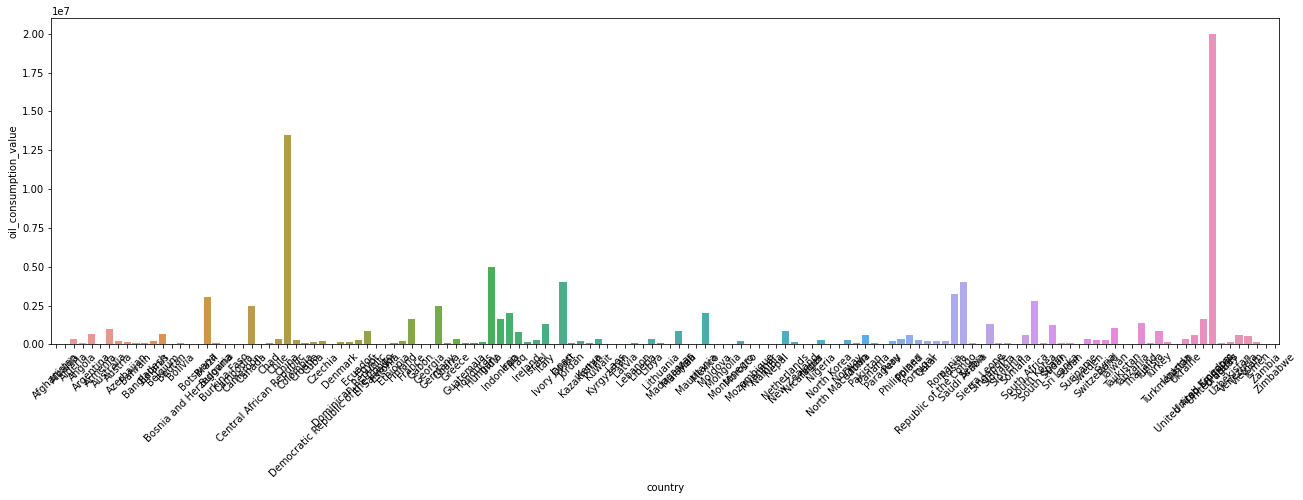

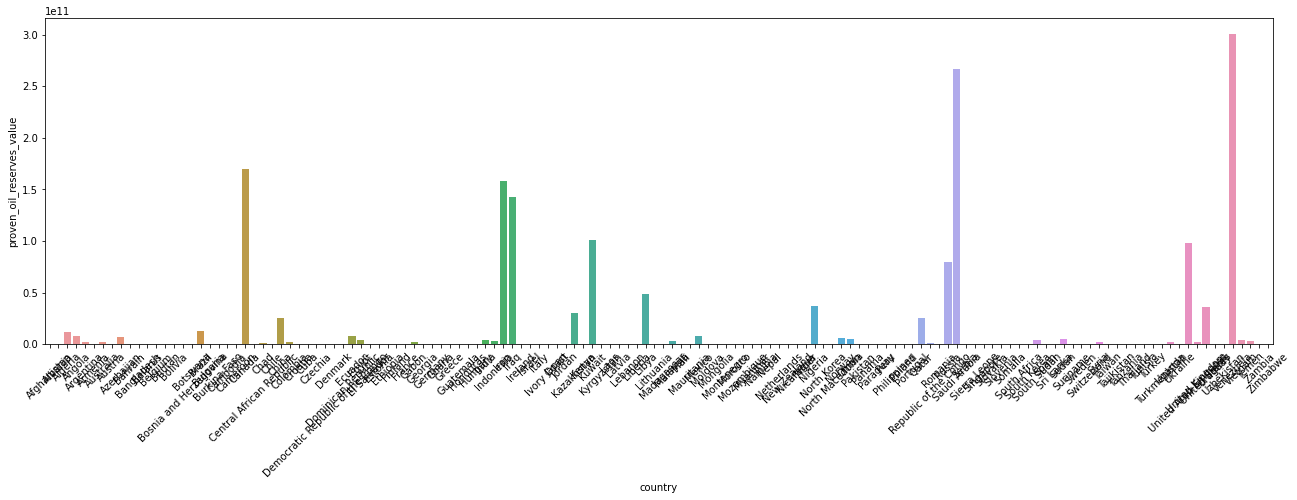

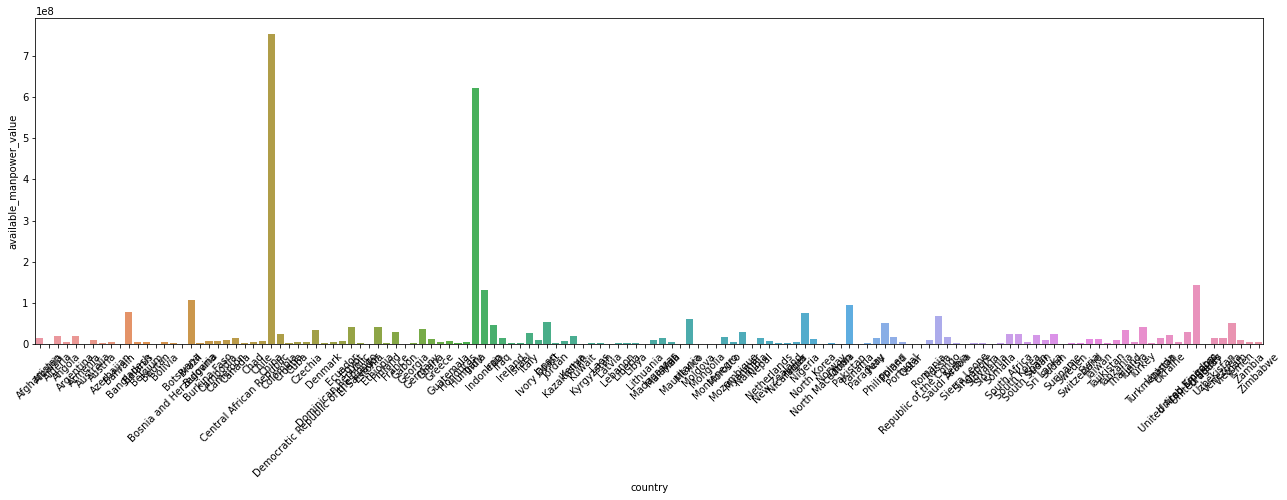

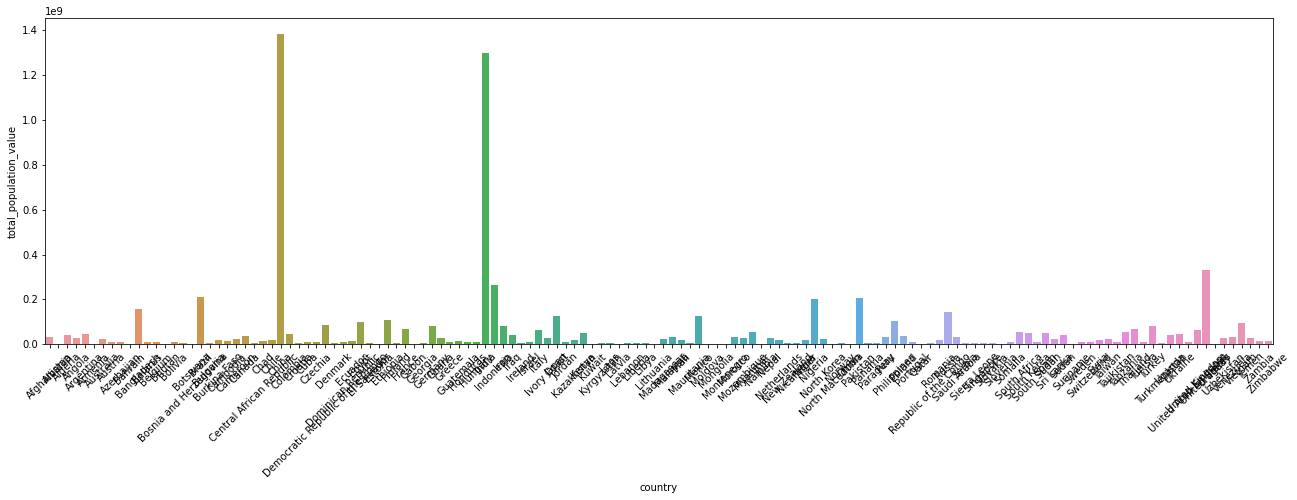

In [208]:
for col in value_df.columns:
    plt.figure(figsize = (22,6))
    sns.barplot(y = value_df[col], x = value_df.index, data = value_df)
    plt.xticks(rotation = 45);

In [217]:
value_df.iplot(kind='hist');

In [218]:
for i in value_df:
    value_df[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen')

In [233]:
fig = px.imshow(value_df.corr(), aspect='auto')
fig.show()

<IPython.core.display.Javascript object>

<a id="4.7"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">Descriptive Statistics</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [214]:
value_df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

<a id="5"></a>
## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">DATA PREPROCESSING</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [238]:
value_df.head()

Military Strength Power Index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                  260.000   
Albania                              2.314                   19.000   
Algeria                              0.466                  551.000   
Angola                               0.838                  295.000   
Argentina                            0.652                  227.000   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                               0.000   
Albania                                   0.000   
Algeria                                 103.000   
Angola                                   72.000   
Argentina                                24.000   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   
Albania                                   0   
Algeria                                  22   
Angola                                   18   
Argentina                                 7   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   
Albania                                            0   
Algeria                                           59   
Angola                                            30   
Argentina                                          9   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                         0.000                          187.000   
Albania                             0.000                           19.000   
Algeria                            87.000                          257.000   
Angola                             47.000                          126.000   
Argentina                          64.000                          100.000   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                       0                0.000   
Albania                                           0                0.000   
Algeria                                          45              880.000   
Angola                                           15              379.000   
Argentina                                         0              370.000   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                1062.000                                    0.000   
Albania                     467.000                                    0.000   
Algeria                    7361.000                                  320.000   
Angola                      595.000                                   28.000   
Argentina                   739.000                                   83.000   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                         176.000                           50.000   
Albania                               0.000                            0.000   
Algeria                             240.000                          316.000   
Angola                              357.000                          115.000   
Argentina                           172.000                           26.000   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   
Albania                          38.000   
Algeria                         201.000   
Angola           

In [239]:
value_df.reset_index(inplace=True)

In [240]:
value_df.head()

country  Military Strength Power Index  aircraft_strength_value  \
0  Afghanistan                          1.344                  260.000   
1      Albania                          2.314                   19.000   
2      Algeria                          0.466                  551.000   
3       Angola                          0.838                  295.000   
4    Argentina                          0.652                  227.000   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                               0.000                              25   
1                               0.000                               0   
2                             103.000                              22   
3                              72.000                              18   
4                              24.000                               7   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                         0.000   
1                                        0                         0.000   
2                                       59                        87.000   
3                                       30                        47.000   
4                                        9                        64.000   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                          187.000                                       0   
1                           19.000                                       0   
2                          257.000                                      45   
3                          126.000                                      15   
4                          100.000                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                0.000                1062.000   
1                0.000                 467.000   
2              880.000                7361.000   
3              379.000                 595.000   
4              370.000                 739.000   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                    0.000                         176.000   
1                                    0.000                           0.000   
2                                  320.000                         240.000   
3                                   28.000                         357.000   
4                                   83.000                         172.000   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                           50.000                       0.000   
1                            0.000                      38.000   
2                          316.000                     201.000   
3                          115.000                      57.000   
4                           26.000                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                43.000   
1           

<a id="5.1"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">The Implementation of Scaling</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [241]:
X = value_df.drop(["country"], axis=1)

In [242]:
scaler = scale

In [243]:
X_scaled = pd.DataFrame(scaler(X))

In [246]:
X_scaled.head()

0      1      2      3      4      5      6      7      8      9   \
0 -0.088 -0.105 -0.355 -0.008 -0.003 -0.345  0.064 -0.264 -0.428 -0.264   
1  0.647 -0.301 -0.355 -0.274 -0.329 -0.345 -0.261 -0.264 -0.428 -0.374   
2 -0.754  0.132  0.093 -0.040  0.313  0.017  0.199  0.200  0.155  0.904   
3 -0.472 -0.076 -0.042 -0.082 -0.003 -0.149 -0.054 -0.110 -0.177 -0.351   
4 -0.613 -0.132 -0.251 -0.199 -0.231 -0.078 -0.104 -0.264 -0.183 -0.324   

      10     11     12     13     14     15     16     17     18     19  \
0 -0.309 -0.272 -0.222 -0.529 -0.177 -0.317 -0.187 -0.486 -0.030 -0.281   
1 -0.309 -0.491 -0.325 -0.259 -0.177 -0.317 -0.187 -0.486 -0.205 -0.277   
2  0.157 -0.192  0.330  0.901 -0.177  0.161 -0.187  0.355 -0.015 -0.279   
3 -0.269 -0.046 -0.087 -0.124 -0.177 -0.317 -0.187 -0.486 -0.104 -0.259   
4 -0.188 -0.276 -0.271 -0.180 -0.177 -0.158  0.251 -0.486 -0.146 -0.165   

      20     21     22     23     24     25  
0 -0.204 -0.353 -0.322 -0.280 -0.132 -0.111  
1 -0.237 -0.343 -0.305 -0.276 -0.284 -0.305  
2 -0.110  0.434 -0.174  0.006 -0.056 -0.070  
3 -0.094  0.650 -0.287 -0.086 -0.228 -0.139  
4  0.702 -0.064 -0.008 -0.229 -0.063 -0.052

In [245]:
X_scaled.shape

(138, 26)

<a id="6"></a>
## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">MODELLING WITH K-MEANS</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

K-Means is the simplest and commonly used iterative type unsupervised learning algorithm. In this Umsupervised algorithm, the K number of centroids in the data is randomly initialized  (the number of optimal K is found using the Elbow method) and iterates these centroids until no change happens to the position of the centroid. Let’s go through the steps involved in K means clustering for a better understanding.
 
- 1) Select the number of clusters for the dataset (K).
 
- 2) Select K number of centroids.
 
- 3) By calculating the Euclidean distance or Manhattan distance assign the points to the nearest centroid, thus creating K groups.
 
- 4) Now find the original centroid in each group.
 
- 5) Again reassign the whole data point based on this new centroid, then repeat step 4 until the position of the centroid doesn’t change.
 
Finding the optimal number of clusters is an important part of this algorithm. A commonly used method for finding optimal K value is Elbow Method.  

<a id="6.1"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">Hopkins Test</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.**

In [252]:
X_scaled1 = X_scaled.copy()
X_scaled2 = X_scaled.copy()
X_scaled3 = X_scaled.copy()

In [253]:
hopkins(scale(X_scaled1), X_scaled1.shape[0])

0.07349334463891728

In [254]:
hopkins(MinMaxScaler().fit_transform(X_scaled2), X_scaled2.shape[0])

0.08320258192710571

In [255]:
hopkins(StandardScaler().fit_transform(X_scaled3), X_scaled3.shape[0])

0.07424838436003178

In [274]:
hopkins(scale(X_scaled1), X_scaled1.shape[0])

0.07367542939738835

<a id="6.2"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">The Implementation of K-Means</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [291]:
# With default value of n_clusters=8

K_means_model1 = KMeans(random_state = 101)

In [292]:
K_means_model1.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 3, 6, 0, 0, 0, 0, 3, 0, 0, 0, 0, 6, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 6, 0, 0, 0, 6, 6, 0, 0, 7, 0, 7, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 6, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 0,
       6, 0, 7, 0, 0, 0, 6, 3, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 4, 1, 0,
       0, 0, 0, 0, 0, 0])

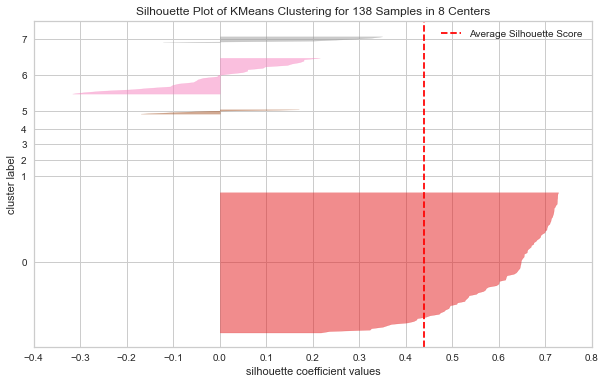

In [297]:
K_means_model1 = KMeans(n_clusters=8, random_state=101)
visualizer = SilhouetteVisualizer(K_means_model1)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

<a id="6.2.1"></a>
#### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">Finding The Best K Value With Elbow Method</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In the Elbow method, we are actually varying the number of clusters (K) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance (SSD) between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K=1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

**So, in short, we use this method to find optimal k value by looking up to break point of graph.**

https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

In [276]:
ssd = []

K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=101)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

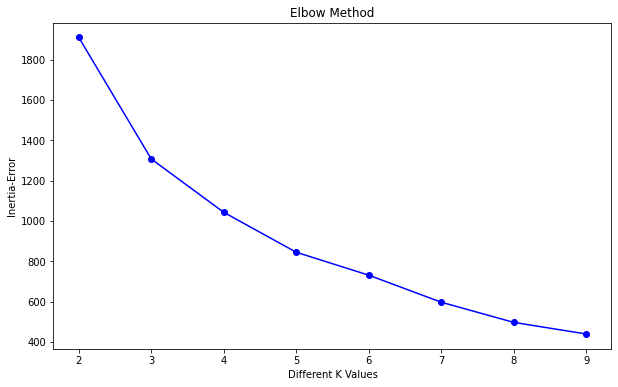

In [280]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different K Values")
plt.ylabel("Inertia-Error") 
plt.title("Elbow Method"); 

In [281]:
ssd # sum of squared distance

[1909.4825400661186,
 1306.8560688687044,
 1042.5482406933293,
 844.4899238963845,
 730.8877767638623,
 596.8408007852493,
 496.84526279155943,
 439.26125637046437]

**Let's make a close look at the differences between SSD scores**

In [282]:
pd.Series(ssd).diff()

0        NaN
1   -602.626
2   -264.308
3   -198.058
4   -113.602
5   -134.047
6    -99.996
7    -57.584
dtype: float64

In [283]:
df1_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df1_diff

0
1     NaN
2 602.626
3 264.308
4 198.058
5 113.602
6 134.047
7  99.996
8  57.584

**Sometimes bar plot gives a better understending of determininf optimal K valuefor analysis.**

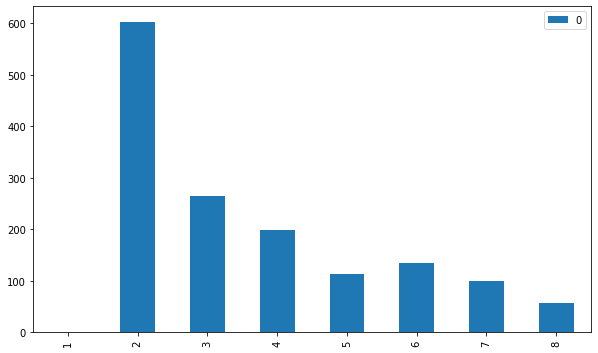

In [285]:
df1_diff.plot(kind='bar');

**Nevertheless, KElbowVisualizer is one of the best option for selecting optimal K value.**

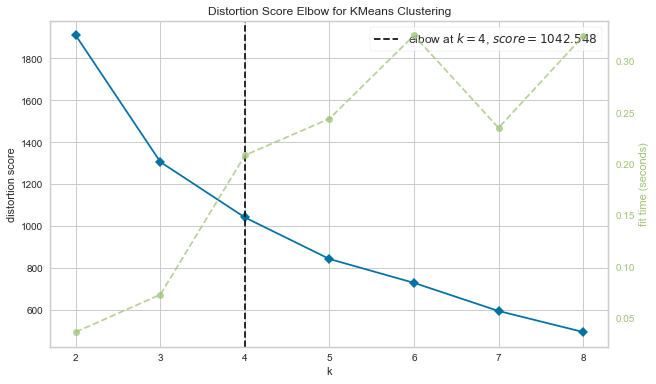

In [302]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=101)
visualizer = KElbowVisualizer(model_, k=(2, 9))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();

<a id="6.2.2"></a>
#### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">The Implementation of K-Means With Optimal K Value & Visualization</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>


In [293]:
# With optimal K value

K_means_model2 = KMeans(n_clusters = 4, random_state = 101)

K_means_model2.fit_predict(X_scaled)

array([1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3,
       1, 3, 1, 1, 1, 0, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 2, 1,
       1, 3, 3, 1, 1, 1])

In [294]:
K_means_model2.labels_

array([1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3,
       1, 3, 1, 1, 1, 0, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 2, 1,
       1, 3, 3, 1, 1, 1])

In [298]:
K_means_model2.inertia_

1042.5482406933293

In [308]:
value_df["K-Means_cluster"] = K_means_model2.labels_

In [311]:
value_df.head()

country  Military Strength Power Index  aircraft_strength_value  \
0  Afghanistan                          1.344                  260.000   
1      Albania                          2.314                   19.000   
2      Algeria                          0.466                  551.000   
3       Angola                          0.838                  295.000   
4    Argentina                          0.652                  227.000   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                               0.000                              25   
1                               0.000                               0   
2                             103.000                              22   
3                              72.000                              18   
4                              24.000                               7   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                         0.000   
1                                        0                         0.000   
2                                       59                        87.000   
3                                       30                        47.000   
4                                        9                        64.000   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                          187.000                                       0   
1                           19.000                                       0   
2                          257.000                                      45   
3                          126.000                                      15   
4                          100.000                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                0.000                1062.000   
1                0.000                 467.000   
2              880.000                7361.000   
3              379.000                 595.000   
4              370.000                 739.000   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                    0.000                         176.000   
1                                    0.000                           0.000   
2                                  320.000                         240.000   
3                                   28.000                         357.000   
4                                   83.000                         172.000   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                           50.000                       0.000   
1                            0.000                      38.000   
2                          316.000                     201.000   
3                          115.000                      57.000   
4                           26.000                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                43.000   
1           

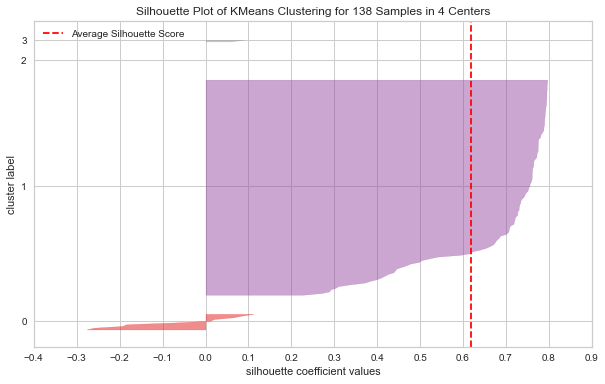

In [375]:
K_means_model2 = KMeans(n_clusters=4, random_state=101)
visualizer = SilhouetteVisualizer(K_means_model2)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [314]:
value_df["K-Means_cluster"].value_counts()

1    103
3     31
0      3
2      1
Name: K-Means_cluster, dtype: int64

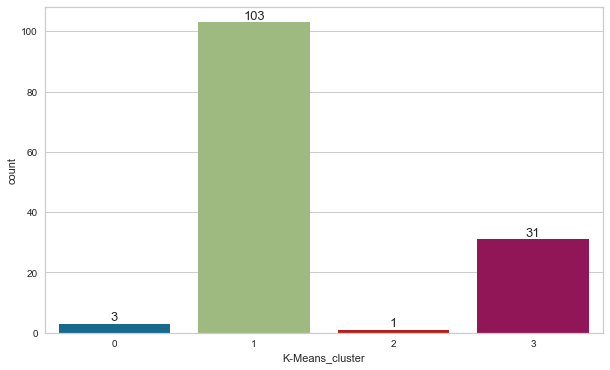

In [337]:
value_df["K-Means_cluster"].value_counts()

sns.countplot(x=value_df["K-Means_cluster"], data=value_df)

for index, value in enumerate(value_df["K-Means_cluster"].value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

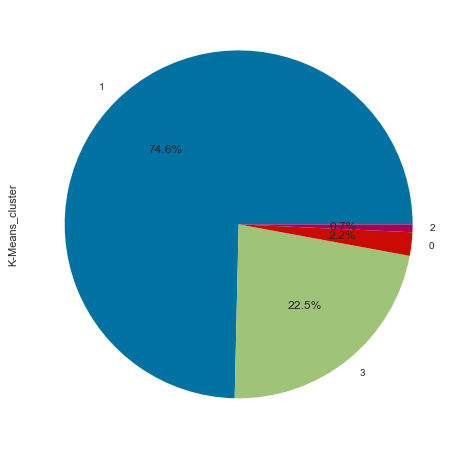

In [339]:
value_df["K-Means_cluster"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10, 8));

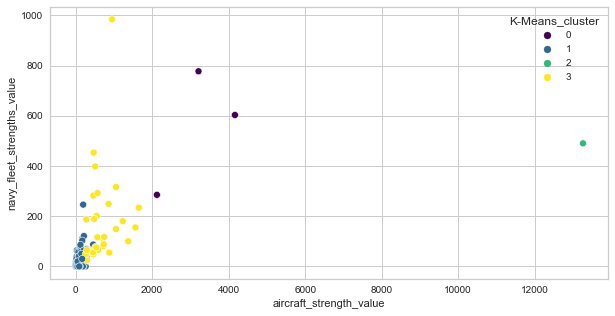

In [315]:
plt.figure(figsize=(10, 5))

sns.scatterplot(value_df["aircraft_strength_value"], 
                value_df["navy_fleet_strengths_value"], hue=value_df["K-Means_cluster"], palette= "viridis");

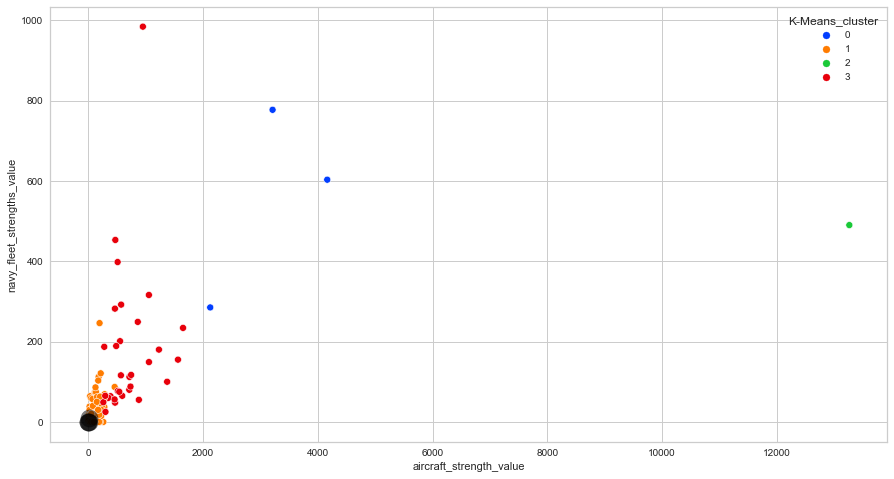

In [328]:
plt.figure(figsize=(15, 8))

sns.scatterplot(value_df["aircraft_strength_value"], 
                value_df["navy_fleet_strengths_value"], hue=value_df["K-Means_cluster"], data=value_df["K-Means_cluster"], palette="bright")

centers = K_means_model2.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 14], c='black', s=300, alpha=0.5);

In [318]:
fig = px.scatter_3d(x=value_df["aircraft_strength_value"],
                   y=value_df["defense_spending_budget_value"],
                   z=value_df["external_debt_value"],
                   color=value_df["K-Means_cluster"],
                   labels = {"x": "aircraft_strength_value",
                             "y": "defense_spending_budget_value",
                             "z": "external_debt_value"},
                   hover_name=value_df["country"])

fig.show()

<IPython.core.display.Javascript object>

In [332]:
value_df[value_df["K-Means_cluster"] == 0][["country", "Military Strength Power Index"]].sort_values(by="Military Strength Power Index")

country  Military Strength Power Index
101  Russia                          0.068
26    China                          0.069
49    India                          0.095

In [333]:
value_df[value_df["K-Means_cluster"] == 1][["country", "Military Strength Power Index"]].sort_values(by="Military Strength Power Index")

country  Military Strength Power Index
96                             Poland                          0.340
109                      South Africa                          0.498
117                       Switzerland                          0.526
89                             Norway                          0.528
116                            Sweden                          0.530
30                            Czechia                          0.553
82                        Netherlands                          0.592
100                           Romania                          0.618
94                               Peru                          0.622
86                            Nigeria                          0.648
4                           Argentina                          0.652
70                           Malaysia                          0.655
10                         Bangladesh                          0.707
25                              Chile                          0.767
95                        Philippines                          0.785
32                            Denmark                          0.788
105                         Singapore                          0.797
132                        Uzbekistan                          0.809
11                            Belarus                          0.818
48                            Hungary                          0.822
3                              Angola                          0.838
77                            Morocco                          0.841
106                          Slovakia                          0.847
39                            Finland                          0.850
38                           Ethiopia                          0.858
97                           Portugal                          0.861
18                           Bulgaria                          0.892
59                         Kazakhstan                          0.910
8                          Azerbaijan                          0.946
103                            Serbia                          0.948
7                             Austria                          0.957
14                            Bolivia                          0.994
34                            Ecuador                          1.006
28                            Croatia                          1.018
12                            Belgium                          1.050
31   Democratic Republic of the Congo                          1.139
58                             Jordan                          1.144
29                               Cuba                          1.221
135                             Yemen                          1.241
90                               Oman                          1.251
114                             Sudan                          1.302
125                      Turkmenistan                          1.329
0                         Afghanistan                          1.344
83                        New Zealand                          1.368
67                              Libya                          1.370
123                           Tunisia                          1.462
113                         Sri Lanka                          1.466
68                          Lithuania                          1.475
60                              Kenya                          1.529
61                             Kuwait                          1.570
126                            Uganda                          1.618
24                               Chad                          1.638
136                            Zambia                          1.646
42                            Georgia                          1.668
98                              Qatar                          1.670
137                          Zimbabwe                          1.758
46                          Guatemala                          1.830
9                           

In [334]:
value_df[value_df["K-Means_cluster"] == 2][["country", "Military Strength Power Index"]].sort_values(by="Military Strength Power Index")

country  Military Strength Power Index
130  United States                          0.061

In [335]:
value_df[value_df["K-Means_cluster"] == 3][["country", "Military Strength Power Index"]].sort_values(by="Military Strength Power Index")

country  Military Strength Power Index
57                  Japan                          0.150
110           South Korea                          0.151
40                 France                          0.170
129        United Kingdom                          0.172
35                  Egypt                          0.187
17                 Brazil                          0.199
124                Turkey                          0.210
55                  Italy                          0.211
43                Germany                          0.219
51                   Iran                          0.219
91               Pakistan                          0.236
50              Indonesia                          0.254
102          Saudi Arabia                          0.303
54                 Israel                          0.311
6               Australia                          0.323
112                 Spain                          0.339
134               Vietnam                          0.356
122              Thailand                          0.357
22                 Canada                          0.371
87            North Korea                          0.372
119                Taiwan                          0.401
127               Ukraine                          0.446
2                 Algeria                          0.466
45                 Greece                          0.531
79                Myanmar                          0.569
27               Colombia                          0.605
73                 Mexico                          0.607
133             Venezuela                          0.645
128  United Arab Emirates                          0.703
52                   Iraq                          0.791
118                 Syria                          0.824

<a id="6.2.3"></a>
#### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">The Assesment of Silhouette Scores</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. 

https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

In [342]:
print(f'Silhouette Score(n=4): {silhouette_score(X_scaled, value_df["K-Means_cluster"])}') # towards to 1 means, data good clustered by model

Silhouette Score(n=4): 0.48302104774861465


In [343]:
range_n_clusters = range(2, 9)

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8644786857054572
For n_clusters=3, the silhouette score is 0.8021249852783661
For n_clusters=4, the silhouette score is 0.48302104774861465
For n_clusters=5, the silhouette score is 0.4972315934864139
For n_clusters=6, the silhouette score is 0.5060944875004629
For n_clusters=7, the silhouette score is 0.48632074984250384
For n_clusters=8, the silhouette score is 0.4388267565700901


**Let's calculate group mean for each feature**

In [350]:
value_df.columns

Index(['country', 'Military Strength Power Index', 'aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value',
       'K-Means_cluster'],
      dtype='object')

In [353]:
X_scaled.head()

0      1      2      3      4      5      6      7      8      9  \
0 -0.088 -0.105 -0.355 -0.008 -0.003 -0.345  0.064 -0.264 -0.428 -0.264   
1  0.647 -0.301 -0.355 -0.274 -0.329 -0.345 -0.261 -0.264 -0.428 -0.374   
2 -0.754  0.132  0.093 -0.040  0.313  0.017  0.199  0.200  0.155  0.904   
3 -0.472 -0.076 -0.042 -0.082 -0.003 -0.149 -0.054 -0.110 -0.177 -0.351   
4 -0.613 -0.132 -0.251 -0.199 -0.231 -0.078 -0.104 -0.264 -0.183 -0.324   

      10     11     12     13     14     15     16     17     18     19  \
0 -0.309 -0.272 -0.222 -0.529 -0.177 -0.317 -0.187 -0.486 -0.030 -0.281   
1 -0.309 -0.491 -0.325 -0.259 -0.177 -0.317 -0.187 -0.486 -0.205 -0.277   
2  0.157 -0.192  0.330  0.901 -0.177  0.161 -0.187  0.355 -0.015 -0.279   
3 -0.269 -0.046 -0.087 -0.124 -0.177 -0.317 -0.187 -0.486 -0.104 -0.259   
4 -0.188 -0.276 -0.271 -0.180 -0.177 -0.158  0.251 -0.486 -0.146 -0.165   

      20     21     22     23     24     25  K-Means_cluster  
0 -0.204 -0.353 -0.322 -0.280 -0.132 -0.111                1  
1 -0.237 -0.343 -0.305 -0.276 -0.284 -0.305                1  
2 -0.110  0.434 -0.174  0.006 -0.056 -0.070                3  
3 -0.094  0.650 -0.287 -0.086 -0.228 -0.139                1  
4  0.702 -0.064 -0.008 -0.229 -0.063 -0.052                1

In [355]:
X_scaled.set_axis(['Military Strength Power Index', 'aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value', 'K-Means_cluster'], axis=1, inplace=True)

In [356]:
X_scaled.head()

Military Strength Power Index  aircraft_strength_value  \
0                         -0.088                   -0.105   
1                          0.647                   -0.301   
2                         -0.754                    0.132   
3                         -0.472                   -0.076   
4                         -0.613                   -0.132   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                              -0.355                          -0.008   
1                              -0.355                          -0.274   
2                               0.093                          -0.040   
3                              -0.042                          -0.082   
4                              -0.251                          -0.199   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                   -0.003                        -0.345   
1                                   -0.329                        -0.345   
2                                    0.313                         0.017   
3                                   -0.003                        -0.149   
4                                   -0.231                        -0.078   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                            0.064                                  -0.264   
1                           -0.261                                  -0.264   
2                            0.199                                   0.200   
3                           -0.054                                  -0.110   
4                           -0.104                                  -0.264   

   tank_strength_value  afv/apc_strength_value  \
0               -0.428                  -0.264   
1               -0.428                  -0.374   
2                0.155                   0.904   
3               -0.177                  -0.351   
4               -0.183                  -0.324   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                   -0.309                          -0.272   
1                                   -0.309                          -0.491   
2                                    0.157                          -0.192   
3                                   -0.269                          -0.046   
4                                   -0.188                          -0.276   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                           -0.222                      -0.529   
1                           -0.325                      -0.259   
2                            0.330                       0.901   
3                           -0.087                      -0.124   
4                           -0.271                      -0.180   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                 -0.177                          -0.317   
1                                 -0.177                          -0.317   
2                                 -0.177                           0.161   
3                                 -0.177                          -0.317   
4                                 -0.177                          -0.158   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                          -0.187                        -0.486   
1                          -0.187                        -0.486   
2                          -0.187                         0.355   
3                          -0.187                        -0.486   
4                           0.251                        -0.486   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                         -0.030               -0.281                -0.204   
1                         -0.205               -0.277                -0.237   
2      

In [357]:
cluster_mean = X_scaled.groupby("K-Means_cluster").mean().T
cluster_mean

K-Means_cluster                              0      1      2      3
Military Strength Power Index           -1.049  0.288 -1.061 -0.821
aircraft_strength_value                  2.262 -0.243 10.489  0.250
fighter/interceptor_strength_value       3.484 -0.284  8.730  0.323
attack_aircraft_strength_value           4.274 -0.223  7.318  0.090
transport_aircraft_fleet_strength_value  2.925 -0.237  9.944  0.185
trainer_aircraft_fleet_value             1.280 -0.256 10.670  0.382
helicopter_fleet_strength_value          1.732 -0.222 10.832  0.222
attack_helicopter_fleet_strength_value   2.606 -0.213  9.708  0.143
tank_strength_value                      4.151 -0.296  3.737  0.462
afv/apc_strength_value                   3.788 -0.336  6.820  0.530
self-propelled_artillery_strength_value  4.610 -0.240  1.828  0.291
towed_artillery_strength_value           4.543 -0.331  2.922  0.564
rocket_projector_strength_value          4.355 -0.232  2.505  0.269
navy_fleet_strengths_value               3.420 -0.351  2.958  0.738
aircraft_carrier_fleet_strength_value    0.564 -0.177 10.948  0.182
submarine_fleet_strength_value           3.718 -0.283  4.939  0.420
destroyer_fleet_strength_value           2.078 -0.183  9.789  0.092
frigate_fleet_strength_value             3.717 -0.334 -0.486  0.767
defense_spending_budget_value            1.511 -0.176 10.974  0.085
external_debt_value                      0.196 -0.193  9.449  0.316
airport_totals_value                     0.331 -0.153 10.941  0.124
oil_production_value                     2.688 -0.249  5.278  0.397
oil_consumption_value                    3.026 -0.258  8.930  0.275
proven_oil_reserves_value                0.582 -0.210  0.577  0.622
available_manpower_value                 5.418 -0.204  1.418  0.106
total_population_value                   5.398 -0.205  1.678  0.106

In [365]:
fig= px.line(cluster_mean, width=1000, height=500)
fig.show()

<IPython.core.display.Javascript object>

<a id="7"></a>
## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">MODELLING WITH HIERARCHICAL CLUSTER ANALYSIS (HCA)</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In general, Hierarchical Clustering Algorithm (HCA) is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom.

The algorithm groups similar objects into groups called clusters. The endpoint is a set of clusters or groups, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

This clustering technique is divided into two types:

- Agglomerative Hierarchical Clustering
- Divisive Hierarchical Clustering

https://www.kdnuggets.com/2019/09/hierarchical-clustering.html

<a id="7.1"></a>
#### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">The Assesment of Dentrogram</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters. 

https://www.displayr.com/what-is-dendrogram/

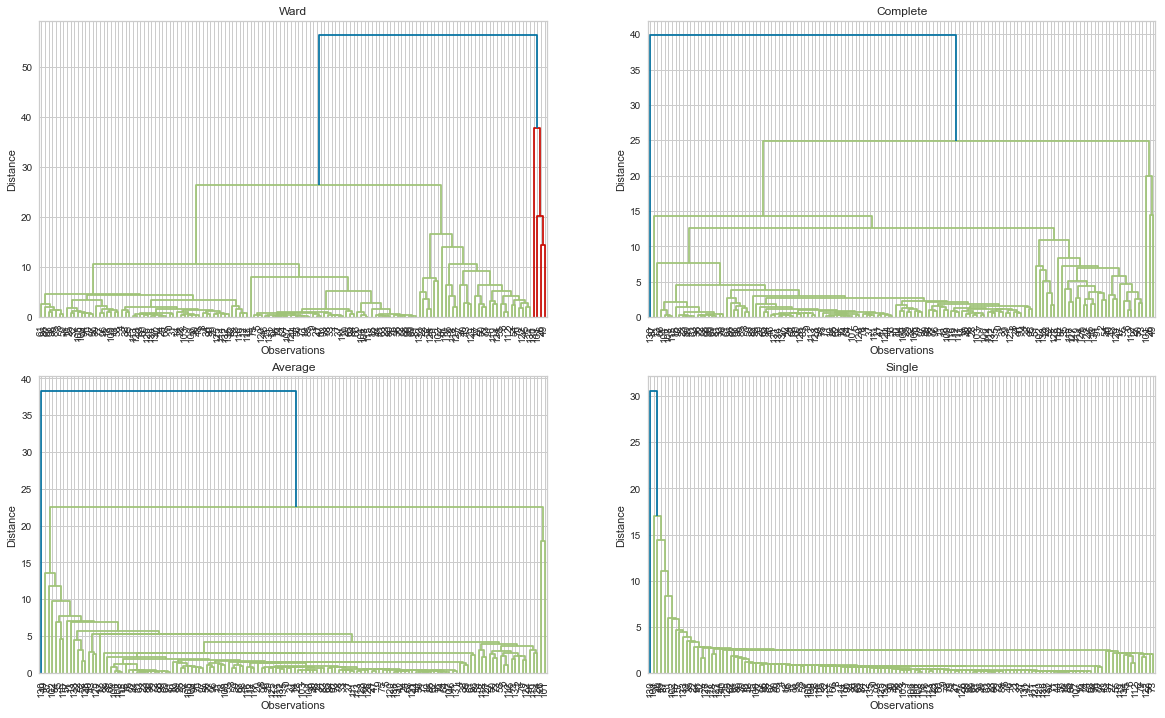

In [369]:
hc_ward = linkage(y = X_scaled, method = "ward")
hc_complete = linkage(X_scaled, "complete")
hc_average = linkage(X_scaled, "average")
hc_single = linkage(X_scaled, "single")

plt.figure(figsize = (20, 12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

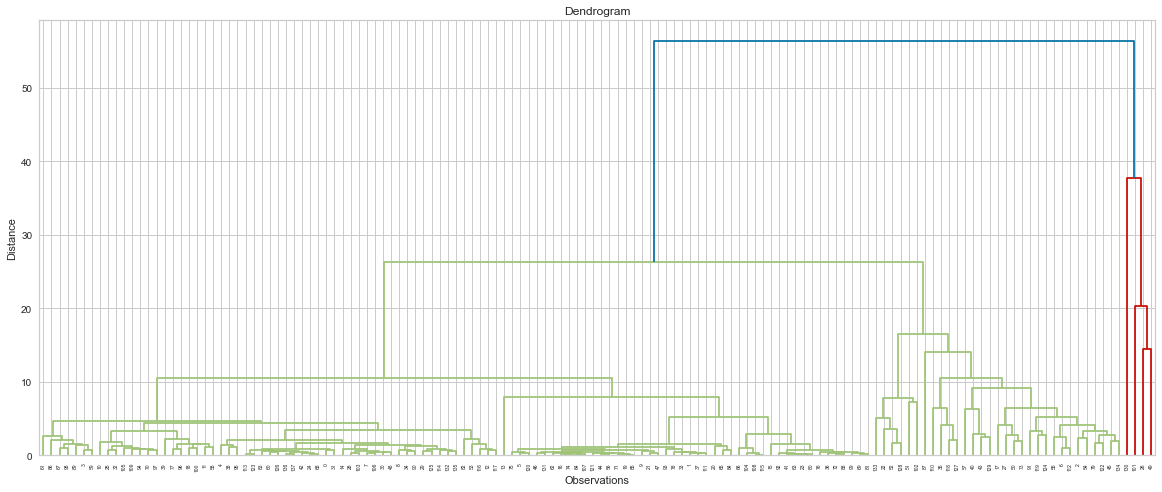

In [368]:
plt.figure(figsize = (20, 8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(linkage(X_scaled, method = "ward"), leaf_font_size = 5);

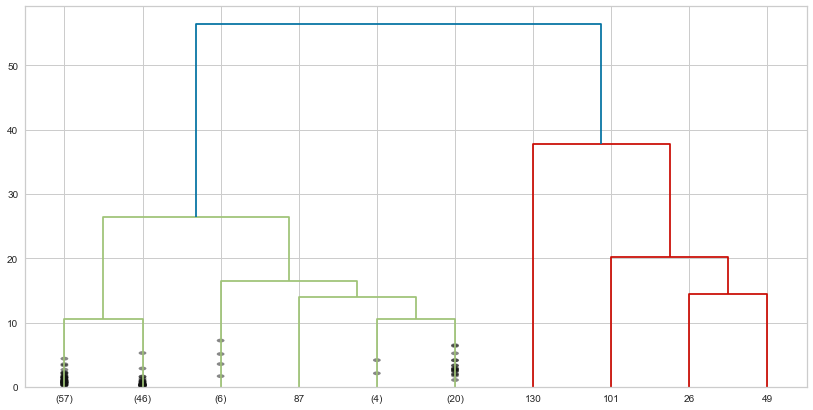

In [371]:
plt.figure(figsize = (14, 7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

<a id="7.2"></a>
#### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">The Assesment of Silhouette Scores For Hierarchical Cluster Analysis (HCA)</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [374]:
K = range(2, 10)

for k in K:
    HC_model_labels = AgglomerativeClustering(n_clusters = k,  
                                    affinity='euclidean', 
                                    linkage='ward').fit_predict(X_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_scaled, HC_model_labels)}')

Silhouette Score for 2 clusters: 0.8408985171956966
Silhouette Score for 3 clusters: 0.8125071329237178
Silhouette Score for 4 clusters: 0.5223520444633668
Silhouette Score for 5 clusters: 0.5223799559092673
Silhouette Score for 6 clusters: 0.5313080548190874
Silhouette Score for 7 clusters: 0.5307497665889273
Silhouette Score for 8 clusters: 0.5261084671533427
Silhouette Score for 9 clusters: 0.5177740585964993


<a id="7.3"></a>
#### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">The Implementation of Hierarchical Cluster Analysis (HCA)</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

### Model Building and label visualisation

In [380]:
HC_model = AgglomerativeClustering(n_clusters = 4,
                                affinity='euclidean',
                                linkage='ward')

In [385]:
HC_clusters = HC_model.fit_predict(X_scaled)
HC_clusters

array([3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       1, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3], dtype=int64)

In [383]:
value_df["HC_model_cluster"] = HC_model.labels_

In [384]:
value_df

country  Military Strength Power Index  \
0                         Afghanistan                          1.344   
1                             Albania                          2.314   
2                             Algeria                          0.466   
3                              Angola                          0.838   
4                           Argentina                          0.652   
5                             Armenia                          2.125   
6                           Australia                          0.323   
7                             Austria                          0.957   
8                          Azerbaijan                          0.946   
9                             Bahrain                          1.855   
10                         Bangladesh                          0.707   
11                            Belarus                          0.818   
12                            Belgium                          1.050   
13                             Bhutan                         10.168   
14                            Bolivia                          0.994   
15             Bosnia and Herzegovina                          3.859   
16                           Botswana                          2.058   
17                             Brazil                          0.199   
18                           Bulgaria                          0.892   
19                       Burkina Faso                          1.901   
20                           Cambodia                          2.056   
21                           Cameroon                          1.990   
22                             Canada                          0.371   
23           Central African Republic                          3.289   
24                               Chad                          1.638   
25                              Chile                          0.767   
26                              China                          0.069   
27                           Colombia                          0.605   
28                            Croatia                          1.018   
29                               Cuba                          1.221   
30                            Czechia                          0.553   
31   Democratic Republic of the Congo                          1.139   
32                            Denmark                          0.788   
33                 Dominican Republic                          2.750   
34                            Ecuador                          1.006   
35                              Egypt                          0.187   
36                        El Salvador                          3.129   
37                            Estonia                          2.589   
38                           Ethiopia                          0.858   
39                            Finland                          0.850   
40                             France                          0.170   
41                              Gabon                          3.374   
42                            Georgia                          1.668   
43                            Germany                          0.219   
44                              Ghana                          2.055   
45                             Greece                          0.531   
46                          Guatemala                          1.830   
47                           Honduras                          2.094   
48                            Hungary                          0.822   
49                              India                          0.095   
50                          Indonesia                          0.254   
51                               Iran                          0.219   
52                               Iraq                          0.791   
53                            Ireland                          1.948   
54                             Israel                          0.311  

In [386]:
value_df["HC_model_cluster"].value_counts()

3    103
1     31
0      3
2      1
Name: HC_model_cluster, dtype: int64

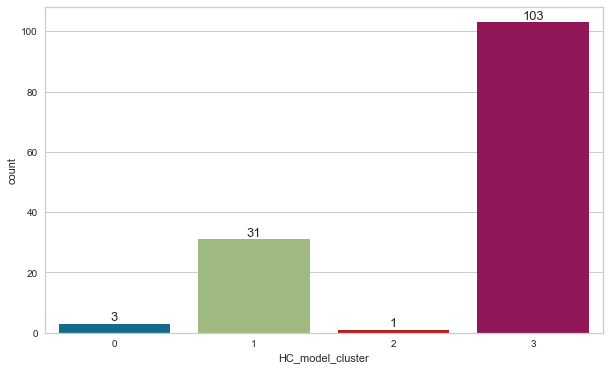

In [387]:
sns.countplot(x=value_df["HC_model_cluster"], data=value_df)

for index, value in enumerate(value_df["HC_model_cluster"].value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

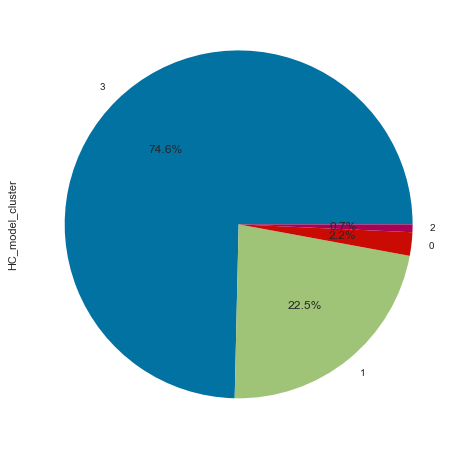

In [388]:
value_df["HC_model_cluster"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10, 8));

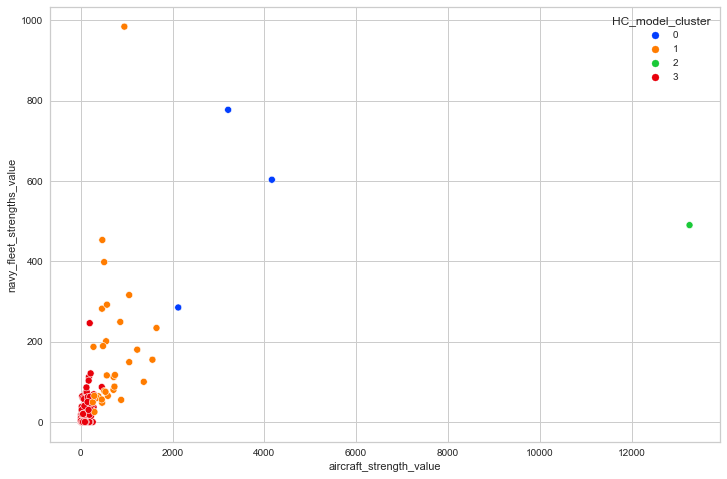

In [392]:
plt.figure(figsize=(12, 8))

sns.scatterplot(value_df["aircraft_strength_value"], 
                value_df["navy_fleet_strengths_value"], hue=value_df["HC_model_cluster"], palette= "bright");

In [393]:
fig = px.scatter_3d(x=value_df["aircraft_strength_value"],
                   y=value_df["defense_spending_budget_value"],
                   z=value_df["external_debt_value"],
                   color=value_df["HC_model_cluster"],
                   labels = {"x": "aircraft_strength_value",
                             "y": "defense_spending_budget_value",
                             "z": "external_debt_value"},
                   hover_name=value_df["country"])

fig.show()

<IPython.core.display.Javascript object>

In [394]:
value_df[value_df["HC_model_cluster"] == 0][["country", "Military Strength Power Index"]].sort_values(by="Military Strength Power Index")

country  Military Strength Power Index
101  Russia                          0.068
26    China                          0.069
49    India                          0.095

In [395]:
value_df[value_df["HC_model_cluster"] == 1][["country", "Military Strength Power Index"]].sort_values(by="Military Strength Power Index")

country  Military Strength Power Index
57                  Japan                          0.150
110           South Korea                          0.151
40                 France                          0.170
129        United Kingdom                          0.172
35                  Egypt                          0.187
17                 Brazil                          0.199
124                Turkey                          0.210
55                  Italy                          0.211
43                Germany                          0.219
51                   Iran                          0.219
91               Pakistan                          0.236
50              Indonesia                          0.254
102          Saudi Arabia                          0.303
54                 Israel                          0.311
6               Australia                          0.323
112                 Spain                          0.339
134               Vietnam                          0.356
122              Thailand                          0.357
22                 Canada                          0.371
87            North Korea                          0.372
119                Taiwan                          0.401
127               Ukraine                          0.446
2                 Algeria                          0.466
45                 Greece                          0.531
79                Myanmar                          0.569
27               Colombia                          0.605
73                 Mexico                          0.607
133             Venezuela                          0.645
128  United Arab Emirates                          0.703
52                   Iraq                          0.791
118                 Syria                          0.824

In [396]:
value_df[value_df["HC_model_cluster"] == 2][["country", "Military Strength Power Index"]].sort_values(by="Military Strength Power Index")

country  Military Strength Power Index
130  United States                          0.061

In [397]:
value_df[value_df["HC_model_cluster"] == 3][["country", "Military Strength Power Index"]].sort_values(by="Military Strength Power Index")

country  Military Strength Power Index
96                             Poland                          0.340
109                      South Africa                          0.498
117                       Switzerland                          0.526
89                             Norway                          0.528
116                            Sweden                          0.530
30                            Czechia                          0.553
82                        Netherlands                          0.592
100                           Romania                          0.618
94                               Peru                          0.622
86                            Nigeria                          0.648
4                           Argentina                          0.652
70                           Malaysia                          0.655
10                         Bangladesh                          0.707
25                              Chile                          0.767
95                        Philippines                          0.785
32                            Denmark                          0.788
105                         Singapore                          0.797
132                        Uzbekistan                          0.809
11                            Belarus                          0.818
48                            Hungary                          0.822
3                              Angola                          0.838
77                            Morocco                          0.841
106                          Slovakia                          0.847
39                            Finland                          0.850
38                           Ethiopia                          0.858
97                           Portugal                          0.861
18                           Bulgaria                          0.892
59                         Kazakhstan                          0.910
8                          Azerbaijan                          0.946
103                            Serbia                          0.948
7                             Austria                          0.957
14                            Bolivia                          0.994
34                            Ecuador                          1.006
28                            Croatia                          1.018
12                            Belgium                          1.050
31   Democratic Republic of the Congo                          1.139
58                             Jordan                          1.144
29                               Cuba                          1.221
135                             Yemen                          1.241
90                               Oman                          1.251
114                             Sudan                          1.302
125                      Turkmenistan                          1.329
0                         Afghanistan                          1.344
83                        New Zealand                          1.368
67                              Libya                          1.370
123                           Tunisia                          1.462
113                         Sri Lanka                          1.466
68                          Lithuania                          1.475
60                              Kenya                          1.529
61                             Kuwait                          1.570
126                            Uganda                          1.618
24                               Chad                          1.638
136                            Zambia                          1.646
42                            Georgia                          1.668
98                              Qatar                          1.670
137                          Zimbabwe                          1.758
46                          Guatemala                          1.830
9                           

### Evaluate 

In [ ]:
df2["military_power"] = df2["predicted_clusters_hc"].map({  0 : "low",
                                                            1 : "medium",
                                                            2 : "most_powerfull",
                                                            3 : "powerfull",
                                                            4 : "weak",
                                                         })

In [ ]:
df2.head(1)

In [ ]:
df2.reset_index(inplace=True)

In [ ]:
df2["predicted_clusters_hc"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10,10));

In [ ]:
df2.predicted_clusters_hc.value_counts()

In [ ]:
df2.predicted_clusters_hc.value_counts()

sns.countplot(x=df2["predicted_clusters_hc"], data=df2)
for index,value in enumerate(df2.predicted_clusters_hc.value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

In [ ]:
df2.groupby("predicted_clusters_hc")["country"].unique()

In [ ]:
df2["military_power"].value_counts()

In [ ]:
df2.groupby("military_power")["country"].unique()["weak"]

In [ ]:
df2.groupby("military_power")["country"].unique()["low"]

In [ ]:
df2.groupby("military_power")["country"].unique()["medium"]

In [ ]:
df2.groupby("military_power")["country"].unique()["powerfull"]

In [ ]:
df2.groupby("military_power")["country"].unique()["most_powerfull"]

In [ ]:
df1['military_strength_power_index'].iplot(kind='hist', bins=200)

In [ ]:
def classification1(military_strength_power_index):
    if military_strength_power_index <= 0.065:
        return "most_powerfull"
    elif 0.065 < military_strength_power_index <= 0.070:
        return "powerfull"
    elif 0.070 < military_strength_power_index <= 0.1:
        return "medium"
    elif 0.1 < military_strength_power_index <= 0.85:
        return "low"
    else:
        return "weak"

In [ ]:
df.military_strength_power_index.sort_values()

In [ ]:
df2['classification'] = df2['military_strength_power_index'].apply(classification1)

In [ ]:
df2['classification'].value_counts()

In [ ]:
df2['military_power'].value_counts()

In [ ]:
df2["classification"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10,10));

In [ ]:
df2.classification.value_counts()

In [ ]:
df2.classification.value_counts()

sns.countplot(x=df2["classification"], data=df2)
for index,value in enumerate(df2.classification.value_counts()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

In [ ]:
df2[["classification", "military_power"]].value_counts()

In [ ]:
df2[["country", "classification", "military_power"]]

In [ ]:
df2[df2["classification"]!=df2["military_power"]][["country", "classification", "military_power"]]